,div.
<img src="https://i.ibb.co/zVKP7sH/IFood-logo-svg.png" alt="IFood-logo-svg" border="0" width="300">
</div>

<h1 align= 'center'>  iFood CRM Data Analyst Case </h1>
<br>

Noa P Prada Schnor
<br>
https://www.linkedin.com/in/npradaschnor/
<br>
npradaschnor@gmail.com
<br>
May 2021

###  About the Company
A. Retail food sector

B. 5 major products separated in Gold and Regular Products: 
1. Wines
2. Rare meat products
3. Exotic fruits
4. Specially prepared fish
5. Sweet products

C. Sales Channels:
1. Store
2. Catalog
3. Online (Company's website)

D. Revenue:
Solid revenue

##### PROBLEM:
Profit growth perspectives for the next 3 years are NOT promising

###### OBJECTIVE: Improve Marketing Performance, focusing on Marketing Campaigns
- To do that:
1. Get the characteristic features of customers who are willing to buy the new gadget;
2. Build predictive model that will support direct Marketing initiatives, producing the highest profit for the next Marketing Campaigns.

###### Dataset to be analysed:
* Next Campaign (Campaign 6 - 'Response') aims to sell a new gadget
* Pilot Campaign a total of 2240 customers randomly selected and contacted by phone regarding the acquisition of the new gadget.
* Dataset contains socio-demographic and firmographic features about the 2240 customers contacted by phone.

###### Pilot campaign data:


|Total cost|Revenue generated |Global profit | Success rate|
|:-:|:-:|:-:|:-:|
|6.720 MU | 3.674 MU | -3.046 MU | 15%|


#### Case divided in 3 parts:
1. Exploratory Data Analysis
2. Customers segmentation based on their behaviour
3. Predictive model to cherry pick customers who will buy the new gadget

In [1]:
#Import libraries/modules
import numpy as np
import pandas as pd

import datetime
import statistics
import statsmodels.discrete.discrete_model as sm
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu

import scipy.sparse as sp


import collections
from collections.abc import Iterable


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score,calinski_harabasz_score as chs
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import yellowbrick
from yellowbrick.utils import KneeLocator, get_param_names
from yellowbrick.style.palettes import LINE_COLOR
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.cluster import InterclusterDistance,intercluster_distance, SilhouetteVisualizer,KElbowVisualizer
from yellowbrick.exceptions import YellowbrickValueError, YellowbrickWarning
from yellowbrick.cluster.elbow import kelbow_visualizer
 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load csv file using pandas
with open ('ml_project1_data.csv') as customers_file:
    customers = pd.read_csv(customers_file)

### Exploratory Analysis & Data Cleaning 

#### Description of features

<div>
<img src="https://i.ibb.co/51VJRT3/ifood-metadata.png" alt="ifood-metadata" border="0" width=500>
</div>

In [3]:
#Glimpse of the dataset
customers.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
#Check columns name
customers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#Check info of each column
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
#Check null values
customers.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#Drop rows with missing values
customers.dropna(inplace=True)

In [8]:
#Check number of rows after droping customers with null value
customers.shape

(2216, 29)

In [9]:
#Check if there is duplicate customer's data
customers.ID.nunique()

2216

In [10]:
#Double check if there is any duplicated row
duplicateRows = customers[customers.duplicated()]
duplicateRows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##### No duplicate data

In [11]:
#Checking unique values of marital status column
customers['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
#Replace 'Alone' with 'Single' and 'Together' as 'Married'
customers['Marital_Status'] = customers['Marital_Status'].replace(['Alone'],'Single')
customers['Marital_Status'] = customers['Marital_Status'].replace(['Together'],'Married')

In [13]:
#Drop rows with akward/imprecise marital status
customers.drop(customers[customers['Marital_Status'] == 'Absurd'].index, inplace=True)
customers.drop(customers[customers['Marital_Status'] == 'YOLO'].index, inplace=True)

In [14]:
#Check the unique values of marital status to confirm that the rows were dropped or replaced
customers['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [15]:
#Check unique values of education
customers['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
#Convert Dt_Customer object to datetime
customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'])

In [17]:
#Check if Dt_Customer is a datetime
customers['Dt_Customer'].dtypes

dtype('<M8[ns]')

In [18]:
#Check first 3 rows of customer data
customers.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [19]:
#Create column Num Children (number of children at home: small kids+teens)
customers_children = customers[['Kidhome','Teenhome']]
customers['Num Children'] = customers_children.sum(axis=1)

In [20]:
#Check min and max year of birth
yobMin = (customers['Year_Birth'].unique()).min()
yobMax = (customers['Year_Birth'].unique()).max()
yobMin, yobMax

(1893, 1996)

In [21]:
#Customers that are 100 or more years
yob1 = customers.Year_Birth.nsmallest(1).iloc[-1]
yob2 = customers.Year_Birth.nsmallest(2).iloc[-1]
yob3 = customers.Year_Birth.nsmallest(3).iloc[-1]
yob4 = customers.Year_Birth.nsmallest(4).iloc[-1]

yob1,yob2,yob3,yob4

(1893, 1899, 1900, 1940)

In [22]:
#Delete rows containing information about customers over 100 years old
customers.drop(customers[customers['Year_Birth'] <= 1900].index, inplace=True)

In [23]:
#Get the age of customers

def age(YOB):
    
    YOB = int(YOB)
    current_year = 2021
    
    if YOB <= 2021:
        age = current_year - YOB
    
    return age

In [24]:
#Categorize customers by age range

def age_range(yo): 
    if yo < 30: 
        return '18-29' 
    elif yo < 40: 
        return '30-39' 
    elif yo < 50: 
        return '40-49' 
    elif yo < 60: 
        return '50-59' 
    elif yo < 70: 
        return '60-69' 
    elif yo < 80: 
        return '70 - 79' 
    elif yo >= 80: 
        return '80+'

In [25]:
#Create a column containing age (in years) of customers and a column categorizing the customer into an age group
customers['Age'] = customers['Year_Birth'].apply(age)
customers['Age Group'] = customers['Age'].apply(age_range)

In [26]:
#Drop column Year_Birth as there is a column containing customer's Age
customers = customers.drop('Year_Birth', axis= 1)

In [27]:
#Check the first 3 rows of the dataset
customers.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num Children,Age,Age Group
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,0,64,60-69
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,2,67,60-69
2,4141,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,0,56,50-59


In [28]:
#Number of months since the customer enrolled

def totalMonths(enrollDt):
    current_date = datetime.datetime(2021,5,8)
    month = enrollDt.month
    day = enrollDt.day
    year = enrollDt.year
    enroll_date = datetime.datetime(year,month,day)
    
    num_months =(current_date.year - enroll_date.year) * 12 + (current_date.month - enroll_date.month)
    
    return num_months

In [29]:
#Create a column with number of total months since the customer enrolled 
customers['Enrolled Months'] = customers['Dt_Customer'].apply(totalMonths)

#Delete column containing date that the customer enrolled with the company as there is a column that shows total number of months since the customer enrolled with the company 
customers = customers.drop(['Dt_Customer'], axis= 1)

In [30]:
#Check 3 first rows of the dataset
customers.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num Children,Age,Age Group,Enrolled Months
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,0,64,60-69,104
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,2,67,60-69,86
2,4141,Graduation,Married,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,0,56,50-59,93


In [31]:
#Create column Total Spent containing the total amount spent on products in the last 2 years
customers_mnt = customers[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']]
customers['Total Spent'] = customers_mnt.sum(axis=1)

In [32]:
#Create a column containing the number of total offers accepted from Campaigns 1 to 5
customers_cmp = customers[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]
customers['Total Campaigns'] = customers_cmp.sum(axis=1)

In [33]:
#Create column Total Purchases containing the Total number of purchases made
customers_purchases = customers[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
customers['Total Purchases'] = customers_purchases.sum(axis=1)

In [34]:
#Marital Status
customers.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

Marital_Status
Married     1429
Single       473
Divorced     231
Widow         76
Name: ID, dtype: int64

##### Most of customers are maried.

In [35]:
#Age Group
customers.groupby("Age Group")["ID"].nunique().sort_values(ascending = False)

Age Group
40-49      647
50-59      579
60-69      465
30-39      314
70 - 79    175
18-29       27
80+          2
Name: ID, dtype: int64

##### Customers are in the late middle age.

In [36]:
#Number of children
customers.groupby("Num Children")["ID"].nunique().sort_values(ascending = False)

Num Children
1    1113
0     630
2     416
3      50
Name: ID, dtype: int64

##### Customers have 1 or more children.

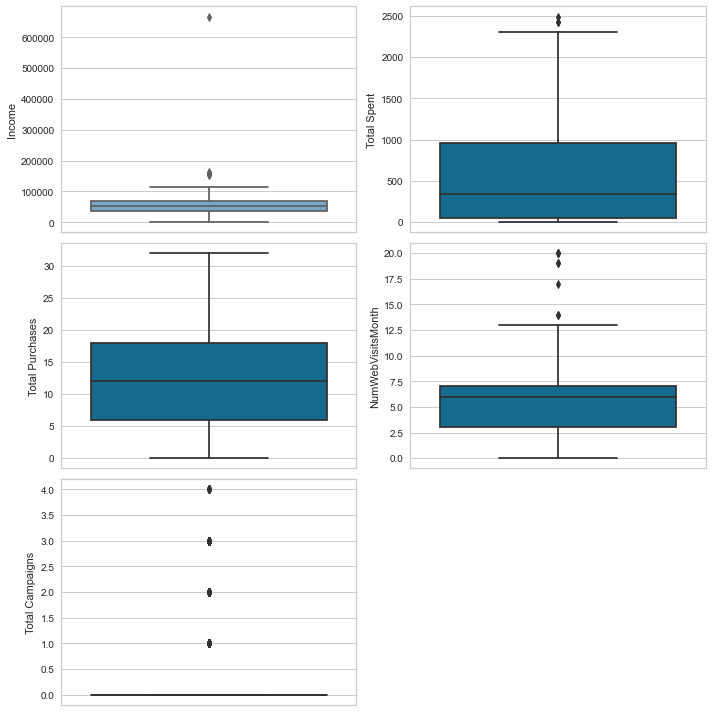

In [37]:
#Plot boxplot - all customers (check the outliers of numerical 'key' features)

#Numerical column list
columns_list = ['Income',
                'Total Spent',
                'Total Purchases',
                'NumWebVisitsMonth',
                'Total Campaigns']

f, ax = plt.subplots(figsize=(10, 10))
plt.subplot(3, 2, 1)
ax1 = sns.boxplot(x=customers['Income'], palette="Blues", orient="v")
plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=customers['Total Spent'], orient="v")
plt.subplot(3, 2, 3)
ax3 = sns.boxplot(x=customers['Total Purchases'], orient="v")
plt.subplot(3, 2, 4)
ax4 = sns.boxplot(x=customers['NumWebVisitsMonth'], orient="v")
plt.subplot(3, 2, 5)
ax4 = sns.boxplot(x=customers['Total Campaigns'], orient="v")
plt.tight_layout()

In [38]:
#Check rows with global outlier of Income
customers[customers['Income'] >= 600000]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Num Children,Age,Age Group,Enrolled Months,Total Spent,Total Campaigns,Total Purchases
2233,9432,Graduation,Married,666666.0,1,0,23,9,14,18,...,3,11,0,1,44,40-49,95,50,0,7


In [39]:
#Check rows with global outlier of total purchases
customers[customers['Total Purchases'] >= 40]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Num Children,Age,Age Group,Enrolled Months,Total Spent,Total Campaigns,Total Purchases


In [40]:
#Check rows with global outlier of number of visits to company's website last month
customers[customers['NumWebVisitsMonth'] >= 20]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Num Children,Age,Age Group,Enrolled Months,Total Spent,Total Campaigns,Total Purchases
9,5899,PhD,Married,5648.0,1,1,68,28,0,6,...,3,11,0,2,71,70 - 79,86,36,1,1
774,4303,PhD,Married,6835.0,0,1,76,107,2,12,...,3,11,0,1,64,60-69,101,125,0,1
1245,6862,Graduation,Divorced,1730.0,0,0,65,1,1,3,...,3,11,0,0,50,50-59,84,7,0,0


In [41]:
#Deleting global outliers for income
customers.drop(customers[customers['Income'] >= 600000].index, inplace=True)

In [42]:
#Check number of rows and columns after droping rows containing outlier for Income
customers.shape

(2208, 34)

##### From 2240, it lasts 2208 after cleaning the data(getting rid of customers with awkward marital status, no income info or with a global outlier income). That way, the final data that will be analysed was reduced by 1.4%.

In [43]:
#Statistical info
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0,5584.532609,3246.084196,0.0,2814.75,5454.5,8418.50,11191.0
Income,2208.0,51943.520833,21536.756816,1730.0,35196.00,51371.0,68487.00,162397.0
Kidhome,2208.0,0.442482,0.537112,0.0,0.00,0.0,1.00,2.0
Teenhome,2208.0,0.505888,0.544330,0.0,0.00,0.0,1.00,2.0
Recency,2208.0,49.057518,28.935531,0.0,24.00,49.0,74.00,99.0
MntWines,2208.0,305.226902,337.606819,0.0,24.00,174.0,505.50,1493.0
MntFruits,2208.0,26.298007,39.731780,0.0,1.75,8.0,33.00,199.0
MntMeatProducts,2208.0,167.004076,224.316242,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2208.0,37.527174,54.578404,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2208.0,27.065217,41.111454,0.0,1.00,8.0,33.00,262.0


#### Age:
Median 51 years old | 75% are under 62 year old

#### Number of months the customer is  enrolled:
The min number of months that the customers are enrolled is 83 (nearly 7 years). Therefore, the dataset does not have recent customers.

Median 94 months (nearly 8 years) | 75% are under 100 months

#### Recency:
The min number of days that the last purchase was made was 24 days ago. The max number of days is over 3 months. So, the customers can buy from a month basis to a trimester basis.

Median 49 days | 75% are under 74 days

#### Products:
Wines and Meat Products seem to be the flagship in the range of products sold as they have the higher amount spent compared to other products.

#### Sales channel:

##### Website(online)
Median 4 | 75% are under 6

##### Catalog
Median 2 | 75% are under 4

##### Store 
Median 3 | 75% are under 8

#### Engagement:
Not every customer checks the company's website regularly (as zero is the min number of visits to the company's website). However, the max number of visits is 20, indicating that it might have a subsample of customers highly engaged.

Median 6 visits last month | 75% are under 7 visits

#### Offers accepted from previous campaigns:
There is not a single customer that accepted all the offers from Campaign 1 to Campaign 5, as the max number of offers accepted is 4.

In [44]:
#Create 'Category' of some features based on their quantiles

In [45]:
#Total num of purchases made quantiles
customers['Total Purchases'].quantile([0.25,0.5,0.75])

0.25     6.00
0.50    12.00
0.75    18.25
Name: Total Purchases, dtype: float64

In [46]:
#Total Spent on products quantiles
customers['Total Spent'].quantile([0.25,0.5,0.75])

0.25     55.0
0.50    342.0
0.75    964.0
Name: Total Spent, dtype: float64

In [47]:
#Recency quantiles
customers['Recency'].quantile([0.25,0.5,0.75])

0.25    24.0
0.50    49.0
0.75    74.0
Name: Recency, dtype: float64

In [48]:
#Gold Prods quantiles
customers['MntGoldProds'].quantile([0.25,0.5,0.75])

0.25     9.0
0.50    24.0
0.75    56.0
Name: MntGoldProds, dtype: float64

In [49]:
#Categorize customers by number of purchases

def cat_purchase(n):
    if n==0:
        return 'None'
    elif n > 0 and n < 6:
        return 'Very Low'
    elif n >= 6 and n < 12:
        return 'Low'
    elif n >= 12 and n < 18.25:
        return 'Mid'
    elif n >= 18.25:
        return 'High'

In [50]:
#Categorize customers by total spend on products
def cat_spend(n):
    if n == 0:
        return 'None'
    elif n > 0 and n <55:
        return 'Low'
    elif n >= 55 and n < 342:
        return 'Lower Mid'
    elif n >= 342 and n < 964:
        return 'Higher Mid'
    elif n >= 964:
        return 'Top'

In [51]:
#Categorize customers by number of offers accepted from previous campaigns
def cat_accepted(n):
    if n == 0:
        return 'None'
    elif n == 1:
        return 'Low'
    elif n == 2:
        return 'Lower Mid'
    elif n == 3:
        return 'Higher Mid'
    elif n == 4:
        return 'Top'

In [52]:
#Categorize customers by recency
def cat_recency(n):
    if n == 0:
        return 'Very Active'
    elif n > 0 and n < 24:
        return 'Active'
    elif  n >= 24 and n < 49:
        return 'Higher Mid Active'
    elif n >= 49 and n < 74:
        return 'Lower Mid Active'
    elif n >= 74:
        return 'Not Active'

In [53]:
#Categorize customers by number of purchased Gold prods
def cat_gold(n):
    if n == 0:
        return 'None'
    elif n > 0 and n < 9:
        return 'Low'
    elif n >= 9 and n < 24:
        return 'Lower Mid'
    elif n >= 24 and n < 56:
        return 'Higher Mid'
    elif n >= 56:
        return 'Top'

In [54]:
def spendPurchase(s,p):
    
    sp = 0
    
    if s == 0 or p == 0:
        return sp
    else:
        sp = round((s/p),2)
        return sp

In [55]:
#Get the percentage value of a feature. E.g. percentage spent on each product
def percentage(n, t):
    
    perc = 0
    
    if n == 0 or t == 0:
        return perc
    
    else:
        perc = round((n * 100)/t,2)
        return perc

In [56]:
#Create column categorizing the following features

#Total Spent on products
customers['Spend Category'] = customers['Total Spent'].apply(cat_spend)

#Total number of purchases
customers['Purchases Category'] = customers['Total Purchases'].apply(cat_purchase)

#Number of offers accepted from previous campaigns
customers['Campaigns Category'] = customers['Total Campaigns'].apply(cat_accepted)

#Number of days since the last purchase - Recency
customers['Recency Category'] = customers['Recency'].apply(cat_recency)

#Number of purchases of Gold Products
customers['Gold Prods Category'] = customers['MntGoldProds'].apply(cat_gold)

#Total spent per purchase
customers['Spend per Purchase'] =customers.apply(lambda row: spendPurchase(row['Total Spent'], row['Total Purchases']),axis=1)

In [57]:
#Percentage of money spend on each product
customers['Wines %'] = customers.apply(lambda row: percentage(row['MntWines'], row['Total Spent']),axis=1)
customers['Meat %'] = customers.apply(lambda row: percentage(row['MntMeatProducts'], row['Total Spent']),axis=1)
customers['Fish %'] = customers.apply(lambda row: percentage(row['MntFishProducts'], row['Total Spent']),axis=1)
customers['Sweet %'] = customers.apply(lambda row: percentage(row['MntSweetProducts'], row['Total Spent']),axis=1)
customers['Fruits %'] = customers.apply(lambda row: percentage(row['MntFruits'], row['Total Spent']),axis=1)

In [58]:
customers['Store %'] = customers.apply(lambda row: percentage(row['NumStorePurchases'], row['Total Purchases']),axis=1)
customers['Web %'] = customers.apply(lambda row: percentage(row['NumWebPurchases'], row['Total Purchases']),axis=1)
customers['Catalog %'] = customers.apply(lambda row: percentage(row['NumCatalogPurchases'], row['Total Purchases']),axis=1)

In [59]:
#Spend per Purchase quantiles
customers['Spend per Purchase'].quantile([0.25,0.5,0.75])

0.25    10.2500
0.50    26.3200
0.75    44.6775
Name: Spend per Purchase, dtype: float64

In [60]:
#Categorize customers by number of purchased Gold prods
def cat_spendPurchase(n):
    if n == 0:
        return 'None'
    elif n > 0 and n < 10.25:
        return 'Low'
    elif n >= 10.25 and n < 26.320513:
        return 'Mid'
    elif n >= 26.320513 and n < 44.675549:
        return 'High'
    elif n >= 44.675549:
        return 'Top'

In [61]:
#Spend per Purchase Category
customers['Spend/Purchase Category'] = customers['Spend per Purchase'].apply(cat_spendPurchase)

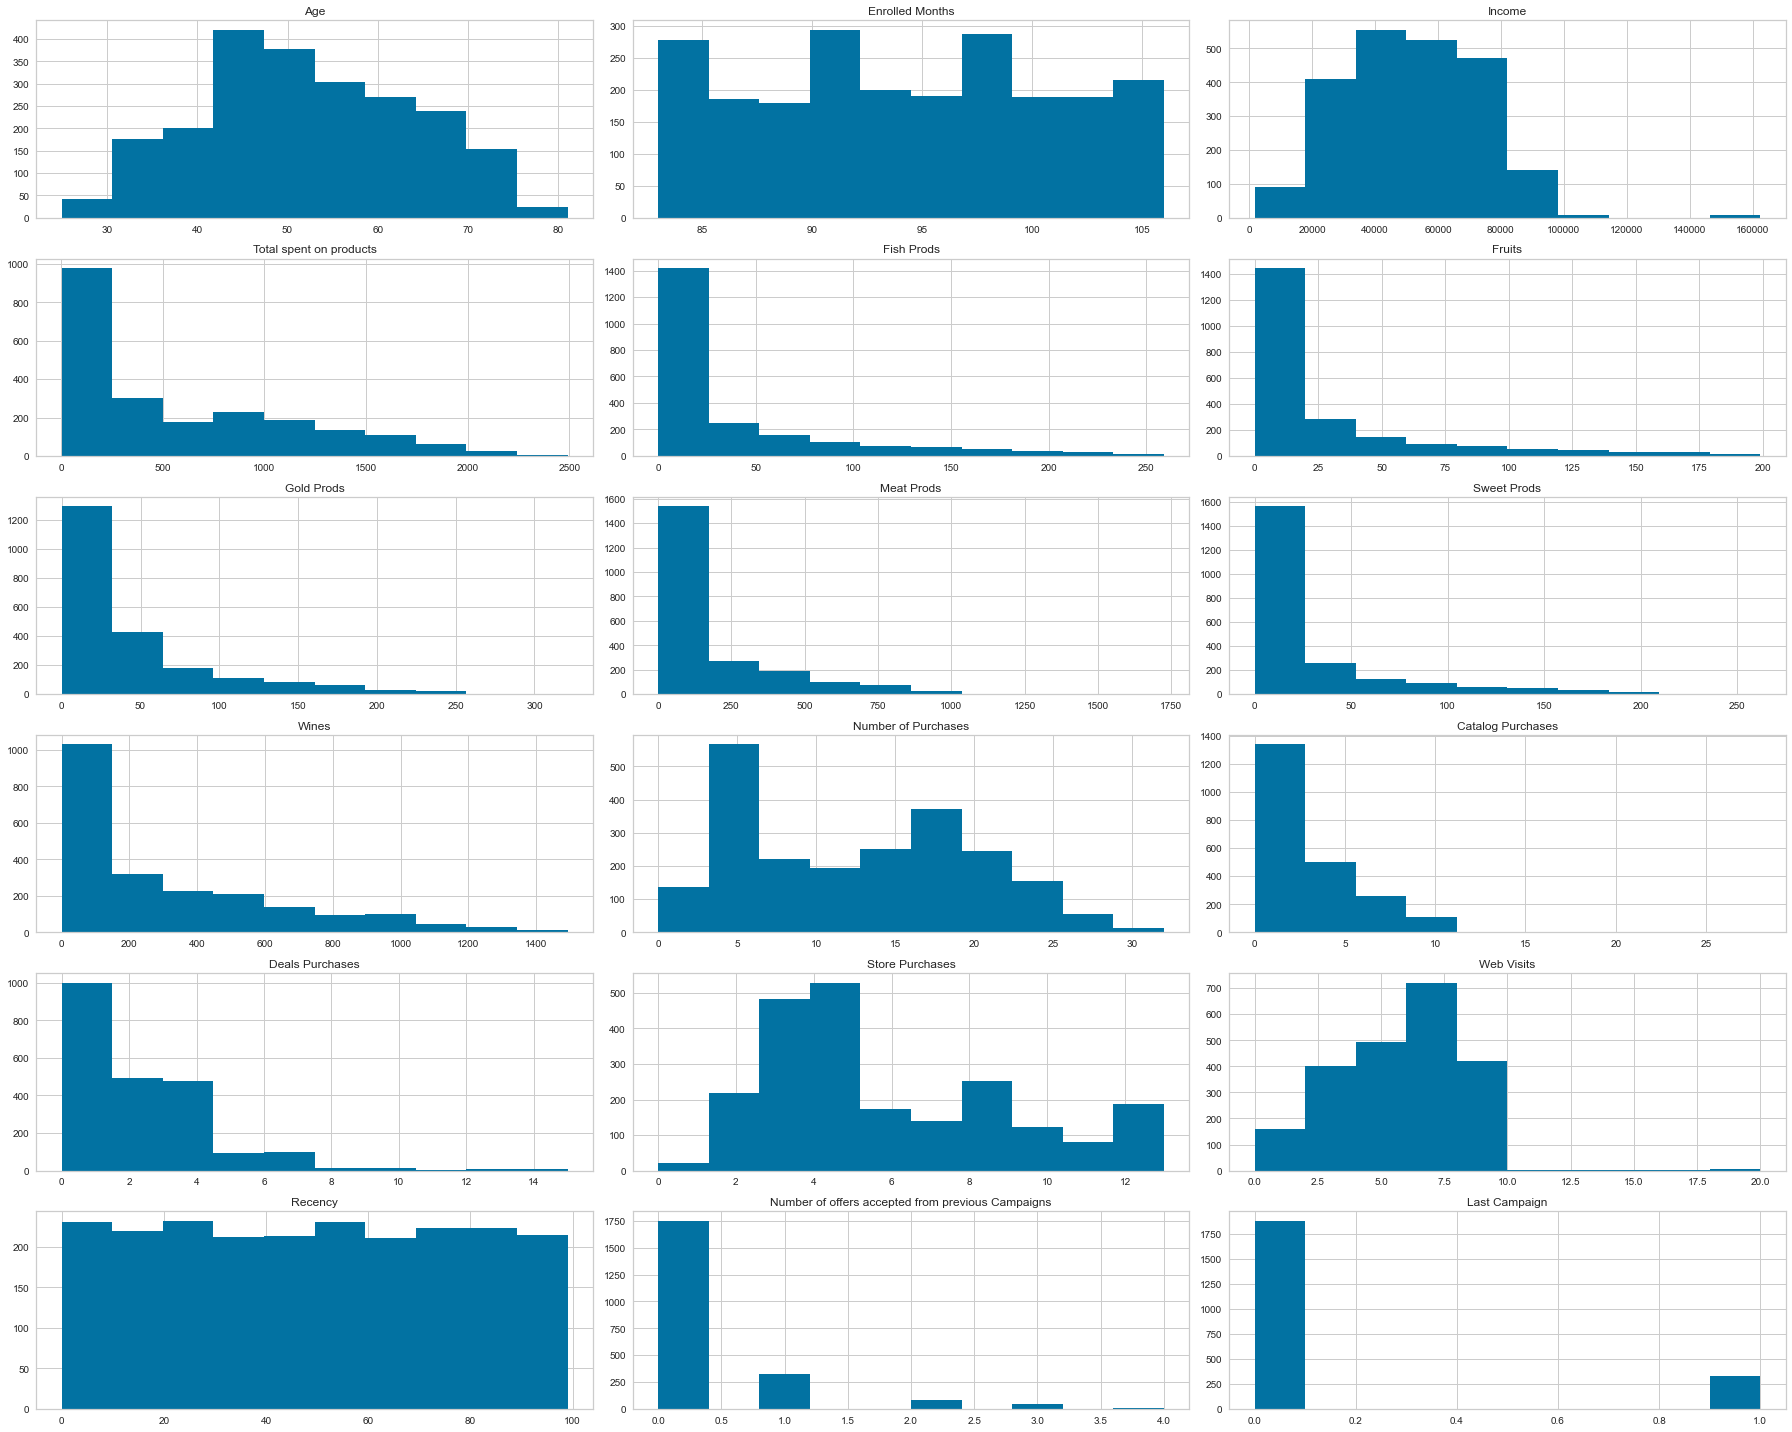

In [62]:
# Check distribution of numerical features

fig, axs = plt.subplots(6, 3, figsize=(25, 20), tight_layout=True)

axs[0, 0].hist(customers["Age"])
axs[0, 0].set_title('Age')
axs[0, 1].hist(customers["Enrolled Months"])
axs[0, 1].set_title('Enrolled Months')
axs[0, 2].hist(customers["Income"])
axs[0, 2].set_title('Income')

axs[1, 0].hist(customers['Total Spent'])
axs[1, 0].set_title('Total spent on products')
axs[1, 1].hist(customers["MntFishProducts"])
axs[1, 1].set_title('Fish Prods')
axs[1, 2].hist(customers["MntFruits"])
axs[1, 2].set_title('Fruits')

axs[2, 0].hist(customers["MntGoldProds"])
axs[2, 0].set_title('Gold Prods')
axs[2, 1].hist(customers["MntMeatProducts"])
axs[2, 1].set_title('Meat Prods')
axs[2, 2].hist(customers["MntSweetProducts"])
axs[2, 2].set_title('Sweet Prods')

axs[3, 0].hist(customers["MntWines"])
axs[3, 0].set_title('Wines')
axs[3, 1].hist(customers['Total Purchases'])
axs[3, 1].set_title('Number of Purchases')
axs[3, 2].hist(customers["NumCatalogPurchases"])
axs[3, 2].set_title('Catalog Purchases')

axs[4, 0].hist(customers["NumDealsPurchases"])
axs[4, 0].set_title('Deals Purchases')
axs[4, 1].hist(customers["NumStorePurchases"])
axs[4, 1].set_title('Store Purchases')
axs[4, 2].hist(customers["NumWebVisitsMonth"])
axs[4, 2].set_title('Web Visits')

axs[5, 0].hist(customers["Recency"])
axs[5, 0].set_title('Recency')
axs[5, 1].hist(customers["Total Campaigns"])
axs[5, 1].set_title('Number of offers accepted from previous Campaigns')
axs[5, 2].hist(customers["Response"])
axs[5, 2].set_title('Last Campaign')

plt.show()


- Columns Z_Revenue and Z_CostContact have one unique value
- After analysing the numbers:
 -- Z_CostContact is the cost of contact per person: 3.0 x Total Number of Customers contacted
 -- Z_Revenue is the revenue per person: 3.0 x Total number of customers who accepted campaign 6 (Response)
 -- So, the profit would be Revenue - Cost (in this case it is a 'negative' profit. In other words, no profit, just loss!)

- Age and Income showed an approximately bell-shaped (Gaussian) distribution
- Most of features showed a positively skewed distribution, excepted number of web visits
- Recency seems to have a uniform distribution

In [63]:
#Category of Gold prods purchased
customers.groupby("Gold Prods Category")["ID"].nunique().sort_values(ascending = False)

Gold Prods Category
Higher Mid    570
Top           558
Lower Mid     540
Low           479
None           61
Name: ID, dtype: int64

More than half of customers are in higher mid and top Gold Prods category

In [64]:
#Number offers accepted from previous campaigns
customers.groupby("Campaigns Category")["ID"].nunique().sort_values(ascending = False)

Campaigns Category
None          1751
Low            322
Lower Mid       80
Higher Mid      44
Top             11
Name: ID, dtype: int64

High number of customers that have not accepted any offer from previous campaigns. Only 11 customers accepted offers from all campaigns.

In [65]:
#Recency categories
customers.groupby("Recency Category")["ID"].nunique().sort_values(ascending = False)

Recency Category
Not Active           566
Lower Mid Active     564
Higher Mid Active    548
Active               502
Very Active           28
Name: ID, dtype: int64

More than half of customers have a high number os day since the last transaction. So, most of customers are not a active buyer.

In [66]:
#Number of Purchases categories
customers.groupby("Purchases Category")["ID"].nunique().sort_values(ascending = False)

Purchases Category
Mid         602
High        552
Low         539
Very Low    509
None          6
Name: ID, dtype: int64

6 customers did not buy any product in the last 2 years. Again, the customers are divided nearly half/half into 2 major categories: high and low frequent buyers.

In [67]:
#Total amount spend on prods categories
customers.groupby("Spend Category")["ID"].nunique().sort_values(ascending = False)

Spend Category
Lower Mid     557
Top           553
Higher Mid    552
Low           546
Name: ID, dtype: int64

In [68]:
#Category of Spend per purchase
customers.groupby("Spend/Purchase Category")["ID"].nunique().sort_values(ascending = False)

Spend/Purchase Category
Mid     557
Top     552
High    552
Low     541
None      6
Name: ID, dtype: int64

The customers are nearly divided half/half into 2 major categories: Low + Lower Mid and Higher Mid + Top. However, when categorized by amount spend on products per purchase, they are not exactly divided into 2 major groups. It looks like they are evenly distributed in 4 groups.

In [69]:
#Replacing columns names with proper/readable names 
customers.rename(columns={
    'Marital_Status': 'Marital', 
    'Kidhome': 'Num Kid', 'Teenhome': 'Num Teen',
    'MntWines': 'Wines','MntFruits': 'Fruits','MntMeatProducts': 'Meat Prods', 'MntFishProducts': 'Fish Prods', 'MntSweetProducts': 'Sweet Prods','MntGoldProds': 'Gold Prods',
    'NumDealsPurchases': 'Deals Purchases','NumWebPurchases': 'Web Purchases', 'NumCatalogPurchases': 'Catalog Purchases', 'NumStorePurchases': 'Store Purchases',
    'NumWebVisitsMonth': 'Web Visits',
    'AcceptedCmp1': 'Campaign 1', 'AcceptedCmp2': 'Campaign 2','AcceptedCmp3': 'Campaign 3','AcceptedCmp4': 'Campaign 4','AcceptedCmp5': 'Campaign 5'}, inplace=True)

In [70]:
#Create a new dataset containing part of the features
customers_ifood = customers.filter([
    'ID',
    'Age', 'Age Group','Marital','Education','Income',
    'Num Kid','Num Teen','Num Children',
    'Enrolled Months',
    'Recency', 'Recency Category',
    'Wines','Wines %','Fruits','Fruits %','Meat Prods','Meat %', 'Fish Prods', 'Fish %','Sweet Prods','Sweet %','Gold Prods', 'Gold Prods Category',
    'Total Spent', 'Spend Category',
    'Deals Purchases', 'Web Purchases','Web %','Catalog Purchases','Catalog %','Store Purchases', 'Store %',
    'Total Purchases', 'Purchases Category',
    'Spend per Purchase','Spend/Purchase Category',
    'Web Visits', 
    'Complain',
    'Campaign 1','Campaign 2','Campaign 3', 'Campaign 4', 'Campaign 5', 'Total Campaigns', 'Campaigns Category',
    'Response'], axis=1)

In [71]:
#Converting customers_ifood to pandas dataframe
index = customers_ifood.index
customers_ifood = pd.DataFrame(data=customers_ifood, index=index)
type(customers_ifood)

pandas.core.frame.DataFrame

In [72]:
#Check the first 5 rows of customers_ifood
customers_ifood.head(5)

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Enrolled Months,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response
0,5524,64,60-69,Single,Graduation,58138.0,0,0,0,104,...,7,0,0,0,0,0,0,0,None,1
1,2174,67,60-69,Single,Graduation,46344.0,1,1,2,86,...,5,0,0,0,0,0,0,0,None,0
2,4141,56,50-59,Married,Graduation,71613.0,0,0,0,93,...,4,0,0,0,0,0,0,0,None,0
3,6182,37,30-39,Married,Graduation,26646.0,1,0,1,87,...,6,0,0,0,0,0,0,0,None,0
4,5324,40,40-49,Married,PhD,58293.0,1,0,1,88,...,5,0,0,0,0,0,0,0,None,0


In [73]:
#Check number of rows and features/columns
customers_ifood.shape

(2208, 47)

In [74]:
#Check datatype of all features
customers_ifood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 47 columns):
ID                         2208 non-null int64
Age                        2208 non-null int64
Age Group                  2208 non-null object
Marital                    2208 non-null object
Education                  2208 non-null object
Income                     2208 non-null float64
Num Kid                    2208 non-null int64
Num Teen                   2208 non-null int64
Num Children               2208 non-null int64
Enrolled Months            2208 non-null int64
Recency                    2208 non-null int64
Recency Category           2208 non-null object
Wines                      2208 non-null int64
Wines %                    2208 non-null float64
Fruits                     2208 non-null int64
Fruits %                   2208 non-null float64
Meat Prods                 2208 non-null int64
Meat %                     2208 non-null float64
Fish Prods                 2208 non

In [75]:
#Convert Income type: float to integer
customers_ifood['Income'] = customers_ifood['Income'].apply(int)
customers_ifood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 47 columns):
ID                         2208 non-null int64
Age                        2208 non-null int64
Age Group                  2208 non-null object
Marital                    2208 non-null object
Education                  2208 non-null object
Income                     2208 non-null int64
Num Kid                    2208 non-null int64
Num Teen                   2208 non-null int64
Num Children               2208 non-null int64
Enrolled Months            2208 non-null int64
Recency                    2208 non-null int64
Recency Category           2208 non-null object
Wines                      2208 non-null int64
Wines %                    2208 non-null float64
Fruits                     2208 non-null int64
Fruits %                   2208 non-null float64
Meat Prods                 2208 non-null int64
Meat %                     2208 non-null float64
Fish Prods                 2208 non-n

In [76]:
customers_ifood.groupby('Education')['ID'].nunique()

Education
2n Cycle       198
Basic           54
Graduation    1114
Master         364
PhD            478
Name: ID, dtype: int64

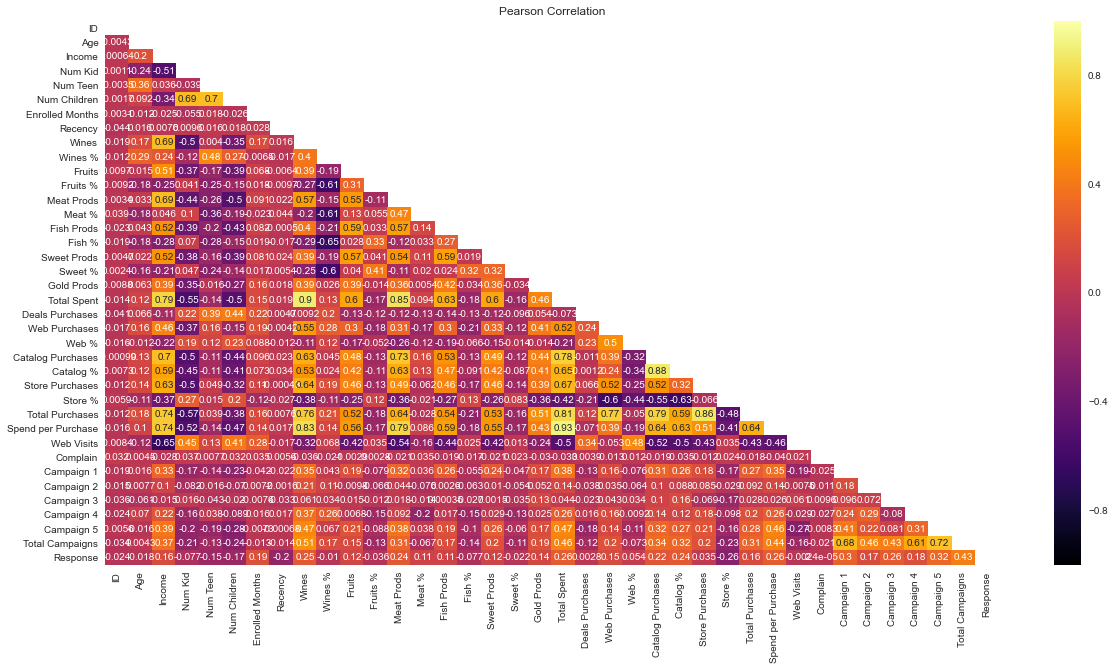

In [77]:
#Check corr between features - customers_ifood 

customers_corr = customers_ifood.corr(method = 'pearson')
fig = plt.figure(figsize = (20, 10))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()


| Degree / Correlation | Coefficient Range|
|-|-|
|High / Strong| ± 0.50 and ± 1 |
| Moderate / Moderate| ± 0.30 and ± 0.49|
|Low / Small | value lies below + . 29|

#### Feature that do not correlated with others:
* Complain

#### Highest correlations - Total amount spend on products:
- Total amount spent on products x Amount spent on wines

#### Who are the customers who spend more on products?
- Higher income
- Do not have kids
- Buy wines and meat
- Purchases frequently
- Accepted offers from campaign 1 and 5
- Purchase made by catalog and store (also correlated to who spend more per purchase) 


#### Who are the customers who purchase frequently?
- Higher income
- Spend more on products, specially wines and meats
- Do not small kids at home

#### Customers who have children:
- Lower income
- Especially small kids, spend much less on products
- Purchase much less
- Purchase products with discount

#### Who are the customers who engage more?
- Have children,specially small kids:
- Lower income
- Not a high spender
- Spend less per purchase
- Purchase deals (product with discount)
- Purchase more online


#### Who are the customers who accepted offers accepted from previous campaigns?
- Higher income
- Accepted Campaigns 5,1, and 4
- Spend more, specially on wines and meat products
- Purchase frequently
- Purchase made by catalog

#### Who are the customers who accepted offer from last campaign (target)?
- Accepted offers from previous campaigns, specially campaigns 1 and 5


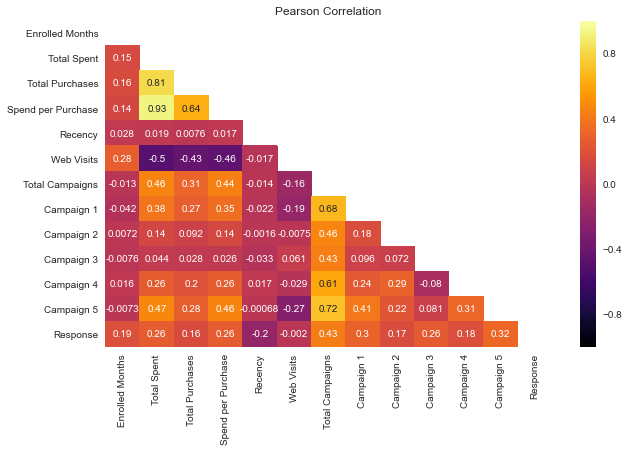

In [78]:
#Check corr between customer's behavioural features. Closer look at them.

cust_corr = customers_ifood.filter([
    'Enrolled Months',
    'Total Spent',
    'Total Purchases',
    'Spend per Purchase',
    'Recency',
    'Web Visits',
    'Total Campaigns',
    'Campaign 1',
    'Campaign 2',
    'Campaign 3',
    'Campaign 4',
    'Campaign 5',
    'Response'],axis=1)

customers_corr = cust_corr.corr(method = 'pearson')
fig = plt.figure(figsize = (10, 6))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()

- Customers who spend more, spend frequently
- Customers who accepted offers from previous campaigns, also accepted offer from last campaign
- Customers who accepted accepted the offer from last campaign tend to spend more on products
- Customers who visits more the company's website have lower number of purchases and spend less on products


### Customer Profile 

#### Who is the customer that accepted at least 1 offer?

In [79]:
#Split the data to check customer's profile

#Customers who accepted at least 1 offer from previous campaigns
cmp = (customers_ifood['Total Campaigns'] >= 1)
accepted = customers_ifood[cmp]

# Customers that never accepted any offer from campaigns 1 to 5
not_accepted = customers_ifood[~cmp]

In [80]:
#Number of customers that accepted at least 1 offer
accepted.shape

(457, 47)

In [81]:
# Create df with median and mean value based on 'accepted or not' the offer
customers_profile = pd.DataFrame()
customers_profile['Median Accepted'] = round(accepted.median(),2)
customers_profile['Mean Accepted'] = round(accepted.mean(),2)
customers_profile['Median not Accepted'] = round(not_accepted.median(),2)
customers_profile['Mean not Accepted'] = round(not_accepted.mean(),2)

customers_profile

,Median Accepted,Mean Accepted,Median not Accepted,Mean not Accepted
ID,5186.00,5335.02,5552.00,5649.65
Age,52.00,52.84,51.00,51.90
Income,69867.00,65184.98,46910.00,48487.58
Num Kid,0.00,0.23,0.00,0.50
Num Teen,0.00,0.40,1.00,0.53
Num Children,1.00,0.63,1.00,1.03
Enrolled Months,94.00,94.01,94.00,94.24
Recency,47.00,48.07,50.00,49.31
Wines,600.00,611.89,104.00,225.19
Wines %,60.50,60.40,48.15,48.60


#### Who accepted at least one offer from previous campaigns:
- Have a higher annual income
- Spent more on products, especially on wines
- Higher number of purchases made, especially by catalog and in store

In [82]:
#Check if there is a difference between those 2 groups (accepted vs not_accepted)

#Select the the numerical features related to customer's behaviour to be 'tested'

accepted_rank = accepted.filter([
    'Enrolled Months',
    'Total Spent',
    'Total Purchases',
    'Spend per Purchase',
    'Recency',
    'Web Visits',
    'Total Campaigns'])

not_accepted_rank = not_accepted.filter([
    'Enrolled Months',
    'Total Spent',
    'Total Purchases',
    'Spend per Purchase',
    'Recency',
    'Web Visits',
    'Total Campaigns'])

#As the distribution of features are not in 'bell shape' (Gaussian Distribution), non parametric tests whose choses to test if the 2 groups are different:
#Null hypothesis: two sets of measurements are drawn from the same distribution.

#1. Wilcoxon rank-sum test
statw,pw = ranksums(accepted_rank, not_accepted_rank)
print('Wilcoxon Results:Statistics=%.3f, p=%.3f' % (statw, pw))

#2.Mann Whitney U test
statm, pm = mannwhitneyu(accepted_rank, not_accepted_rank)
print('Mann Whitney Results: Statistics=%.3f, p=%.3f' % (statm, pm))

Wilcoxon Results:Statistics=271.335, p=0.000
Mann Whitney Results: Statistics=-2893065.000, p=0.000


The Wilcoxon rank-sum test an Mann Whitney U test results clearly show that the 2 groups are not drawn from the same distribution.

In [83]:
# Check characteristics of customers who accepted offers from previous campaigns

#Social economic characteristics

# Age
customers_accepted=accepted.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

customersAge =(pd.merge(customers_accepted,customers_not_accepted,on='Age Group'))
customersAge = customersAge.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
customersAge

,Age Group,Yes,Y %,No,N %
0,18-29,7,1.53,20,1.14
1,30-39,73,15.97,241,13.76
2,40-49,112,24.51,534,30.50
3,50-59,115,25.16,464,26.50
4,60-69,102,22.32,363,20.73
5,70 - 79,47,10.28,128,7.31
6,80+,1,0.22,1,0.06


Customers who accepted or not offers from previous campaigns have similar age.

In [84]:
#Marital Status
customers_accepted=accepted.groupby(["Marital"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Marital"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

MaritalStatus=(pd.merge(customers_accepted,customers_not_accepted,on='Marital'))
MaritalStatus = MaritalStatus.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
MaritalStatus

,Marital,Yes,Y %,No,N %
0,Divorced,46,10.07,185,10.57
1,Married,295,64.55,1133,64.71
2,Single,98,21.44,375,21.42
3,Widow,18,3.94,58,3.31


There is not difference between groups (accepted vs not accepted offers from previous campaigns). 

In [85]:
#Education - accepted 1 or more campaigns
customers_accepted=accepted.groupby(["Education"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Education"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

EducationLevel=(pd.merge(customers_accepted,customers_not_accepted,on='Education'))
EducationLevel = EducationLevel.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
EducationLevel

,Education,Yes,Y %,No,N %
0,2n Cycle,37,8.10,161,9.19
1,Basic,6,1.31,48,2.74
2,Graduation,227,49.67,887,50.66
3,Master,74,16.19,290,16.56
4,PhD,113,24.73,365,20.85


Again, no difference regarding education level between the 2 groups.

In [86]:
#Category of total amount spent on products

customers_accepted=accepted.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

SpendCat=(pd.merge(customers_accepted,customers_not_accepted,on='Spend Category'))
SpendCat = SpendCat.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
SpendCat

,Spend Category,Yes,Y %,No,N %
0,Higher Mid,116,25.38,436,24.90
1,Low,48,10.50,498,28.44
2,Lower Mid,46,10.07,511,29.18
3,Top,247,54.05,306,17.48


A huge difference between these 2 groups when they are analysed by spend category. It is clear that who accepted offers from previous campaigns spend much more than those who did not accept any offer.

In [87]:
# Category amount spend on Products per purchase

customers_accepted=accepted.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

GoldProds =(pd.merge(customers_accepted,customers_not_accepted,on='Spend/Purchase Category'))
GoldProds = GoldProds.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
GoldProds

,Spend/Purchase Category,Yes,Y %,No,N %
0,High,107,23.41,445,25.41
1,Low,44,9.63,497,28.38
2,Mid,56,12.25,501,28.61
3,Top,250,54.70,302,17.25


Customers who accepted a offer from previous campaigns spend more per purchase than those who did not accepted a offer.

In [88]:
# Category amount spend on Gold Products

customers_accepted=accepted.groupby(["Gold Prods Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Gold Prods Category"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

GoldProds =(pd.merge(customers_accepted,customers_not_accepted,on='Gold Prods Category'))
GoldProds = GoldProds.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
GoldProds

,Gold Prods Category,Yes,Y %,No,N %
0,Higher Mid,155,33.92,415,23.70
1,Low,26,5.69,453,25.87
2,Lower Mid,88,19.26,452,25.81
3,None,12,2.63,49,2.80
4,Top,176,38.51,382,21.82


Looks like the customers who belong to the High Mid to the Top Category of Number of Gold Products purchased the last 2 years also belong to the group of customers who accepted a offer from previous campaigns.
72.43% of customers who accepted one or more offers from last campaign are in the Top/Higher Mid of amount spent on Gold Products. While less than half of customers who did not accepted an offer are in those categories.

In [89]:
#Category of total number of purchases

customers_accepted=accepted.groupby(["Purchases Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Purchases Category"])["ID"].nunique().reset_index()
customers_accepted["Yes %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["No %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

PurchasesCat=(pd.merge(customers_accepted,customers_not_accepted,on='Purchases Category'))
PurchasesCat = PurchasesCat.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
PurchasesCat

,Purchases Category,Yes,Yes %,No,No %
0,High,201,43.98,351,20.05
1,Low,48,10.50,491,28.04
2,Mid,162,35.45,440,25.13
3,Very Low,46,10.07,463,26.44


Customers who accepted a offer from previous campaigns purchases more frequently than those who did not accepted a offer.

In [90]:
#Category number of days since the last purchase (Recency)

customers_accepted=accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

customersRecency=(pd.merge(customers_accepted,customers_not_accepted,on='Recency Category'))
customersRecency = customersRecency.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
customersRecency

,Recency Category,Yes,Y %,No,N %
0,Active,111,24.29,391,22.33
1,Higher Mid Active,119,26.04,429,24.50
2,Lower Mid Active,116,25.38,448,25.59
3,Not Active,108,23.63,458,26.16
4,Very Active,3,0.66,25,1.43


- Spent on products: 79.43% accepted x 42.38% not accepted
- Spend per purchase: 78.11% accepted x 42.66% (top+high)
- Gold Prods: 72.43% accepted x 45.52% not accepted (top+high mid)
- Frequency(number of purchases): 40 % of customers who accepted a offer from previous campaigns are in the high category for number of purchases. While more than half of customers who did not accept a offer purchased a low or none number of times. 
- Recency: nearly 50% of customers are 'active'(very active,active,higher mid active) regardless if accepted or not a offer from previous campaigns

In [91]:
#Engagement on company's website (number of visits to company's website last month)

customers_accepted=accepted.groupby(["Web Visits"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Web Visits"])["ID"].nunique().reset_index()
customers_accepted["Y %"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["N %"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

WebVisits=(pd.merge(customers_accepted,customers_not_accepted,on='Web Visits'))
WebVisits = WebVisits.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
WebVisits

,Web Visits,Yes,Y %,No,N %
0,1,50,10.94,98,5.60
1,2,67,14.66,133,7.60
2,3,53,11.60,150,8.57
3,4,44,9.63,172,9.82
4,5,43,9.41,235,13.42
5,6,70,15.32,264,15.08
6,7,61,13.35,326,18.62
7,8,51,11.16,287,16.39
8,9,17,3.72,65,3.71
9,20,1,0.22,2,0.11


Seems that the customers that accepted at least one offer from previous campaigns do not engage in the same frequency as the customers who did not accept a offer. 
Supposing that the customers who visited the company's website 4+ times in the last month checks the website weekly, then 53.2% of customers who accepted vs 68.4% of customers who did not accept a offer visited the company's website at least once a week.
Moreover, looking at the proportion of customers that did not engage at all in the last month, nearly 11% of customers who accepted a offer did not visit the company's website, while the group of customers who did not accept showed half of that number.
Basically, meaning that the customers that accepted a offer from previous campaigns are not the ones that engage more.

### Who is the customer that accepted the last campaign?

In [92]:
#Split the data to check customer's profile

#Customers who accepted the targeted campaign
cmp6 = (customers_ifood['Response'] == 1) #331 customers
acceptedCmp6 = customers_ifood[cmp6]

# Customers that did not accept last campaign
not_acceptedCmp6 = customers_ifood[~cmp6]


In [93]:
# Create df with median and mean value based on 'accepted or not' the offer
customers_response = pd.DataFrame()
customers_response['Median Accepted'] = round(acceptedCmp6.median(),2)
customers_response['Mean Accepted'] = round(acceptedCmp6.mean(),2)
customers_response['Median not Accepted'] = round(not_acceptedCmp6.median(),2)
customers_response['Mean not Accepted'] = round(not_acceptedCmp6.mean(),2)

customers_response

,Median Accepted,Mean Accepted,Median not Accepted,Mean not Accepted
ID,5093.00,5398.10,5527.00,5617.41
Age,50.00,51.59,51.00,52.19
Income,64090.00,60187.75,50150.00,50489.69
Num Kid,0.00,0.34,0.00,0.46
Num Teen,0.00,0.31,1.00,0.54
Num Children,0.00,0.65,1.00,1.00
Enrolled Months,99.00,97.27,93.00,93.65
Recency,30.00,35.29,52.00,51.48
Wines,448.00,503.26,153.00,270.31
Wines %,51.72,50.46,51.69,51.15


#### Customers who accepted the Campaign 6:
- Have no or less children
- Are clients for longer time
- Recently had a transaction with the company
- Accepted more offers from previous campaigns
- Buy less products with discount
- High spenders
- Spend much more per purchase
- Purchase frequently, especially by catalog

In [94]:
# Age - accepted or no the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

customersAgeCmp6 =(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Age Group'))
customersAgeCmp6 = customersAgeCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
customersAgeCmp6

,Age Group,Yes,Y %,No,N %
0,18-29,5,1.51,22,1.17
1,30-39,65,19.64,249,13.27
2,40-49,84,25.38,562,29.94
3,50-59,81,24.47,498,26.53
4,60-69,67,20.24,398,21.20
5,70 - 79,29,8.76,146,7.78


No difference between groups.

In [95]:
#Marital Status - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Marital"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Marital"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

MaritalStatusCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Marital'))
MaritalStatusCmp6 = MaritalStatusCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
MaritalStatusCmp6

,Marital,Yes,Y %,No,N %
0,Divorced,48,14.50,183,9.75
1,Married,158,47.73,1270,67.66
2,Single,107,32.33,366,19.50
3,Widow,18,5.44,58,3.09


Looks like customers who accepted the last campaign are married and single. While those who did not accepted are mainly married.

In [96]:
#Number of children - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Num Children"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Num Children"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

ChildrenCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Num Children'))
ChildrenCmp6 = ChildrenCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
ChildrenCmp6

,Num Children,Yes,Y %,No,N %
0,0,167,50.45,463,24.67
1,1,115,34.74,997,53.12
2,2,47,14.20,369,19.66
3,3,2,0.60,48,2.56


Nearly half of the sample that accepted a offer do not have children. In other hand, more than 70% of customers that not accepted a offer have children.

In [97]:
#Education - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Education"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Education"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

EducationLevelCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Education'))
EducationLevelCmp6 = EducationLevelCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
EducationLevelCmp6

,Education,Yes,Y %,No,N %
0,2n Cycle,22,6.65,176,9.38
1,Basic,2,0.60,52,2.77
2,Graduation,151,45.62,963,51.31
3,Master,56,16.92,308,16.41
4,PhD,100,30.21,378,20.14


Mainly the customers have 3rd level degree, irrespective of acceptance of a offer from previous campaigns.

In [98]:
#Spend on products category - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

SpendCatCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Spend Category'))
SpendCatCmp6 = SpendCatCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
SpendCatCmp6

,Spend Category,Yes,Y %,No,N %
0,Higher Mid,61,18.43,491,26.16
1,Low,37,11.18,509,27.12
2,Lower Mid,67,20.24,490,26.11
3,Top,166,50.15,387,20.62


Clearly customers who accepted last campaign's offer spend much more than those who did not accept the offer.

In [99]:
#Amount spend on products per purchase - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

SpendPurCatCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Spend/Purchase Category'))
SpendPurCatCmp6 = SpendPurCatCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
SpendPurCatCmp6

,Spend/Purchase Category,Yes,Y %,No,N %
0,High,62,18.73,490,26.11
1,Low,34,10.27,507,27.01
2,Mid,73,22.05,484,25.79
3,Top,162,48.94,390,20.78


Besides spend much more on products, customers who accepted the offer from last campaign also spend much more per purchase made.

In [100]:
#Purchase category - accepted or not the last campaign
customers_acceptedCmp6=acceptedCmp6.groupby(["Purchases Category"])["ID"].nunique().reset_index()
customers_not_acceptedCmp6=not_acceptedCmp6.groupby(["Purchases Category"])["ID"].nunique().reset_index()
customers_acceptedCmp6["Y %"] = round(100*(customers_acceptedCmp6['ID']/(customers_acceptedCmp6['ID'].sum())),2)
customers_not_acceptedCmp6["N %"] = round(100*(customers_not_acceptedCmp6['ID']/(customers_not_acceptedCmp6['ID'].sum())),2)

PurchasesCatCmp6=(pd.merge(customers_acceptedCmp6,customers_not_acceptedCmp6,on='Purchases Category'))
PurchasesCatCmp6 = PurchasesCatCmp6.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
PurchasesCatCmp6

,Purchases Category,Yes,Y %,No,N %
0,High,117,35.35,435,23.18
1,Low,61,18.43,478,25.47
2,Mid,118,35.65,484,25.79
3,Very Low,35,10.57,474,25.25


Customers who accepted last campaign's offer purchase more frequently compared to customers who did not accept the offer.

#### RFM Technique

RFM segmentation technique is the idea that marketers can gain an extensive understanding of their customers by analyzing three quantifiable factors:
1. Recency: How much time has elapsed since a customer’s last transaction with the company?
2. Frequency: How often has a customer transacted during a particular period of time? 
3. Monetary: How much a customer has spent with the company during a particular period of time?

#### Who is the best customer taking into the account those 3 factors?

##### Customers who:
1. Recency: recently has a transaction with the company
2. Frequency: with frequent transactions with the company
3. Monetary: is a big spender

##### Step 1: assign Recency, Frequency and Monetary values to each customer

In [101]:
#Create df with RFM features
customers_rfm=pd.DataFrame()
customers_rfm["ID"] = customers_ifood['ID']
customers_rfm["Recency"] = customers_ifood['Recency']
customers_rfm["Frequency"] = customers_ifood['Total Purchases']
customers_rfm["Monetary"]=customers_ifood['Total Spent']

customers_rfm.head(10)

,ID,Recency,Frequency,Monetary
0,5524,58,22,1529
1,2174,38,4,21
2,4141,26,20,734
3,6182,26,6,48
4,5324,94,14,407
5,7446,16,20,702
6,965,34,17,563
7,6177,32,8,146
8,4855,19,5,44
9,5899,68,1,36


##### Step 2:  divide the customer list into tiered groups for each of the three dimensions (R, F and M)

|Recency	|Frequency	|Monetary|
|-|-|-|
| R Tier | F Tier | M Tier |
|1 (most recent) | 4 (most frequent) |	4 (highest spend)
|2	| 3| 3|
|3	|2	|2|
|4 (least recent)|1 (less transactions)|	1 (lowest spend) |

In [102]:
#Create Tier based on the quartiles of each individual column

customers_rfm["R Tier"] = pd.cut(customers_rfm["Recency"], 
                                       bins=[-1, 
                                       np.percentile(customers_rfm["Recency"], 25), 
                                       np.percentile(customers_rfm["Recency"], 50), 
                                       np.percentile(customers_rfm["Recency"], 75), 
                                       customers_rfm["Recency"].max()], 
                                       labels=[1, 2, 3, 4]).astype("int")

customers_rfm["F Tier"] = pd.cut(customers_rfm['Frequency'], 
                                       bins=[-1, 
                                       np.percentile(customers_rfm['Frequency'], 25), 
                                       np.percentile(customers_rfm['Frequency'], 50), 
                                       np.percentile(customers_rfm['Frequency'], 75), 
                                       customers_rfm['Frequency'].max()], 
                                       labels=[4, 3, 2, 1]).astype("int")

customers_rfm["M Tier"] = pd.cut(customers_rfm['Monetary'], 
                                       bins=[-1, 
                                       np.percentile(customers_rfm['Monetary'], 25), 
                                       np.percentile(customers_rfm['Monetary'], 50), 
                                       np.percentile(customers_rfm['Monetary'], 75), 
                                       customers_rfm['Monetary'].max()], 
                                       labels=[4, 3, 2, 1]).astype("int")

customers_rfm.head(10)

,ID,Recency,Frequency,Monetary,R Tier,F Tier,M Tier
0,5524,58,22,1529,3,1,1
1,2174,38,4,21,2,4,4
2,4141,26,20,734,2,1,2
3,6182,26,6,48,2,4,4
4,5324,94,14,407,4,2,2
5,7446,16,20,702,1,1,2
6,965,34,17,563,2,2,2
7,6177,32,8,146,2,3,3
8,4855,19,5,44,1,4,4
9,5899,68,1,36,3,4,4


In [103]:
#Calculate the overall RFM score by summing up the three scores.RFM score: range from 3 to 12. 
customers_rfm["RFM Score"] = customers_rfm['R Tier'] + customers_rfm['F Tier'] + customers_rfm['M Tier']

In [104]:
customers_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 8 columns):
ID           2208 non-null int64
Recency      2208 non-null int64
Frequency    2208 non-null int64
Monetary     2208 non-null int64
R Tier       2208 non-null int32
F Tier       2208 non-null int32
M Tier       2208 non-null int32
RFM Score    2208 non-null int32
dtypes: int32(4), int64(4)
memory usage: 120.8 KB


In [105]:
customers_rfm.shape

(2208, 8)

In [106]:
#Standarlise and reduce data before geting the best number of k means

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(customers_rfm))

reduced_customers_clusters = PCA(n_components=2).fit_transform(df)

### Customer Segmentation: K-Means Clustering

In [107]:
#Using the elbow method to find the optimal number of k

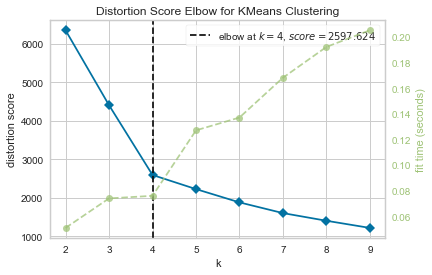

AttributeError: 'KMeans' object has no attribute 'k'

TypeError: 'NoneType' object is not iterable

In [109]:
kelbow_visualizer(KMeans(random_state=0), reduced_customers_clusters, k=(2,10))

In [ ]:
#Checking 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=2208, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(reduced_customers_clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=2208, c='blue')
plt.show()

In [ ]:
#Evaluate the density and separation between clusters

#Intercluster distance - k=4
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(reduced_customers_clusters)
visualizer.show()  

In [ ]:
#Silhouette visualizer

#k = 4
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(reduced_customers_clusters)    # Fit the data to the visualizer
visualizer.poof()

#width of each silhouette is proportional to the number of samples assigned to the cluster


|Range|	Interpretation|
|-|-|
|0.71 - 1.0|	A strong structure has been found.|
|0.51 - 0.7	|A reasonable structure has been found.|
|0.26 - 0.5	|The structure is weak and could be artificial.|
|< 0.25	|No substantial structure has been found.|

#####  k means and silhouette analysis - 4 clusters of customers

##### Step 3: select groups of customers based on the RFM Tiers

In [110]:
#K means clustering for customer segmentation. k = 4

km = KMeans(n_clusters=4, random_state=1)
km.fit(reduced_customers_clusters)
predict=km.predict(reduced_customers_clusters)
customers_rfm['Cluster'] = pd.Series(predict, index=customers_rfm.index)

customers_rfm.head(5)

,ID,Recency,Frequency,Monetary,R Tier,F Tier,M Tier,RFM Score,Cluster
0,5524,58,22,1529,3,1,1,5,1
1,2174,38,4,21,2,4,4,10,0
2,4141,26,20,734,2,1,2,5,2
3,6182,26,6,48,2,4,4,10,0
4,5324,94,14,407,4,2,2,8,1


In [111]:
#Check clusters

#Percentage of customers per cluster
profile_group=customers_rfm.groupby(["Cluster"])["ID"].nunique().reset_index()
profile_group["Profile %"] = round(100*(profile_group['ID']/(profile_group['ID'].sum())),2)

profile_group.head()

,Cluster,ID,Profile %
0,0,566,25.63
1,1,562,25.45
2,2,541,24.50
3,3,539,24.41


Customers evenly distributed among clusters.

In [112]:
#Add RFM features to customers_ifood features to create customers_merged
customers_rfm = customers_rfm.sort_values(by=['ID'])
customers_ifood = customers_ifood.sort_values(by=['ID'])

customers_merged = pd.concat([customers_ifood, customers_rfm['R Tier']], axis=1)
customers_merged = pd.concat([customers_merged, customers_rfm['F Tier']], axis=1)
customers_merged = pd.concat([customers_merged, customers_rfm['M Tier']], axis=1)
customers_merged = pd.concat([customers_merged, customers_rfm['RFM Score']], axis=1)
customers_merged = pd.concat([customers_merged, customers_rfm['Cluster']], axis=1)

customers_merged['ID'].nunique()

2208

All 2208 were included in the segmentation.

In [113]:
#Median of Recency, Frequency, Monetary and Number of Months that the customer is enrolled with the company

recency_profile=customers_merged.groupby(["Cluster"])["Recency"].median().reset_index()
frequency_profile=customers_merged.groupby(["Cluster"])["Total Purchases"].median().reset_index()
monetary_profile=customers_merged.groupby(["Cluster"])["Total Spent"].median().reset_index()
enroll_profile = customers_merged.groupby(["Cluster"])["Enrolled Months"].median().reset_index()
rfm_data=pd.merge(pd.merge(pd.merge(recency_profile,frequency_profile,on='Cluster'),monetary_profile,on='Cluster'),enroll_profile,on='Cluster')
rfm_data

,Cluster,Recency,Total Purchases,Total Spent,Enrolled Months
0,0,24,6,52.5,93
1,1,73,18,966.0,96
2,2,24,19,964.0,95
3,3,76,6,60.0,93


##### Clusters Profile

||Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3|
|-|-|-|-|-|
|'Name'|Lower Spender|At risk customers | Top customers|Lost customers |
|Recency| Recent transaction| Long time do not buy|Recent bought |Long time do not buy |
|Frequency| Do not purchase frequently| Used to buy frequently| Buy frequently|Do not purchase frequently |
|Monetary| Do not spend much| Used to be a high spender|High spender |Lower spender |

In [114]:
def customer_profile(c):
    if c == 1:
        return 'At risk'
    elif c == 0:
        return 'Lower'
    elif c == 3:
        return 'Lost'
    elif c == 2:
        return 'Top'

In [115]:
#Add Profile based on RFM Tiers
customers_merged['Profile'] = customers_merged['Cluster'].apply(customer_profile)

In [116]:
#Accepted at least 1 offer
TCampaigns = customers_merged[customers_merged['Total Campaigns']>0]

#Accepted all offers
TCampaigns_all = customers_merged[customers_merged['Total Campaigns']==4]

#Customers who accepted the offers from the 6th Campaign's pilot
Camp6 = customers_merged[customers_merged['Response'] == 1]

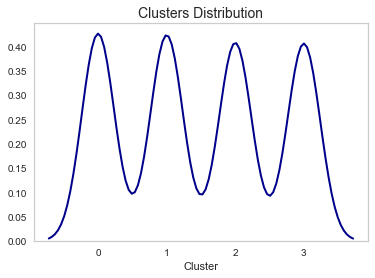

In [117]:
#Cluster distribution with all the customers 
plt.figure(figsize = [6,4])
sns.distplot(customers_merged['Cluster'], hist=False, kde=True, 
             bins=4, color = 'darkblue', 
             kde_kws={'linewidth': 2})
plt.title("Clusters Distribution",fontsize=14)
plt.grid(b=None)

As already known, the clusters/profiles are evenly distributed.

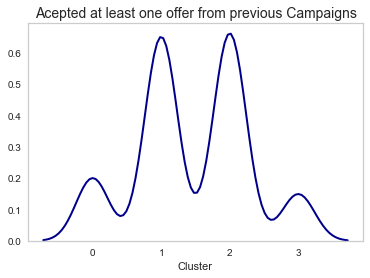

In [118]:
#Customers who accepted at least one offer: cluster distribution
plt.figure(figsize = [6,4])
sns.distplot(TCampaigns['Cluster'], hist=False,kde=True, 
             bins=4, color = 'darkblue', 
             kde_kws={'linewidth': 2})
plt.title('Acepted at least one offer from previous Campaigns',fontsize=14)
plt.grid(b=None)

Customers who accepted at least one offer from previous campaigns belong to clusters 1 and 2. Customers in cluster 0 and 3 are prone to not accept any offer from campaigns.

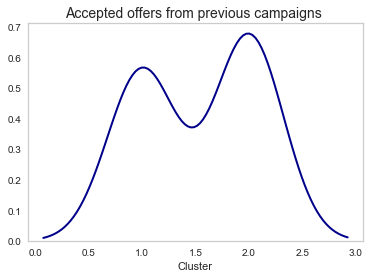

In [119]:
#Cluster distribution - customers who accepted at least one offer
plt.figure(figsize = [6,4])
sns.distplot(TCampaigns_all['Cluster'], hist=False, kde=True, 
             bins=4, color = 'darkblue', 
             kde_kws={'linewidth': 2})
plt.title("Accepted offers from previous campaigns ",fontsize=14)
plt.grid(b=None)

Higher offer accepted by customers in the clusters 1 and 2.

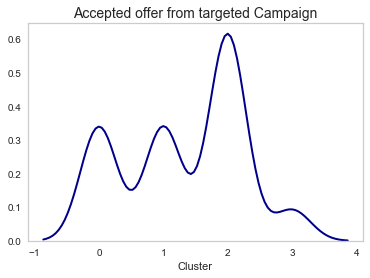

In [120]:
#Cluster distribution - customers who accepted offer from the 6th Campaign
plt.figure(figsize = [6,4])
sns.distplot(Camp6['Cluster'], hist=False, kde=True, 
             bins=4, color = 'darkblue', 
             kde_kws={'linewidth': 2})
plt.title("Accepted offer from targeted Campaign",fontsize=14)
plt.grid(b=None)

Customers in the cluster 2 are the ones to aim for, as they were the ones with higher RFM and higher acceptance of offer from campaign 6 (target). Customers in the cluster 3 are the ones that probably won't buy the new gadget.

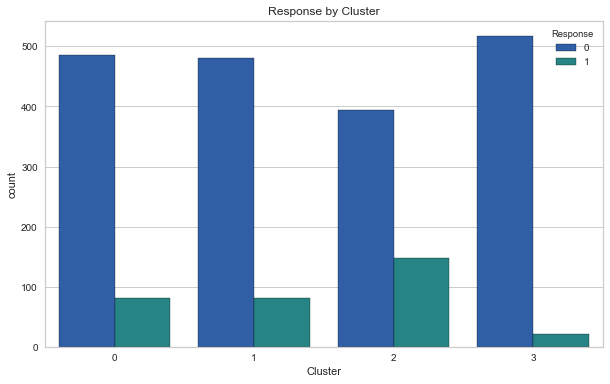

In [121]:
plt.figure(figsize = (10,6))
sns.countplot(x= customers_merged['Cluster'], edgecolor = 'black',palette='winter', saturation = 0.55,hue=customers_merged['Response'],orient='v') 
plt.title('Response by Cluster', fontsize=12)
plt.show()

Again, the data above confirmed that customers in the cluster 2 have a higher proportion of customers who accepted offer from campaign 6 (target) compared to the other clusters. Customers in the cluster 3 are the ones that probably won't accept the offer from campaign 6.

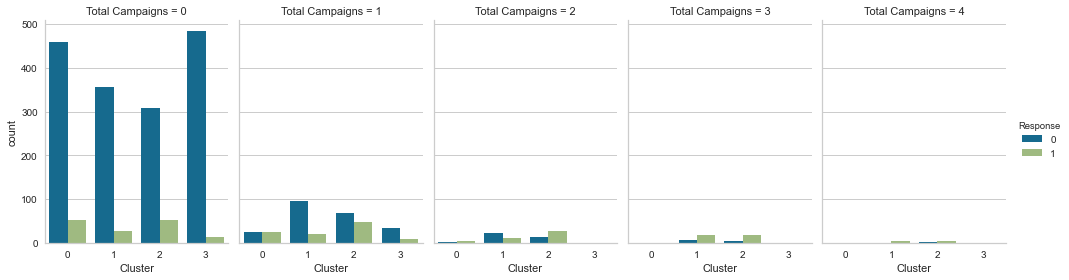

In [122]:
#Check Number of offers accepted from previous Campaigns per Cluster
TCampaigns_Response = sns.catplot(x='Cluster', hue="Response", col="Total Campaigns",
                data=customers_merged, kind="count",
                height=4, aspect=.7);

TCampaigns_Response

Clusters 1 and 2 have more customers who accepted higher number of offers compared to other clusters.

<AxesSubplot:>

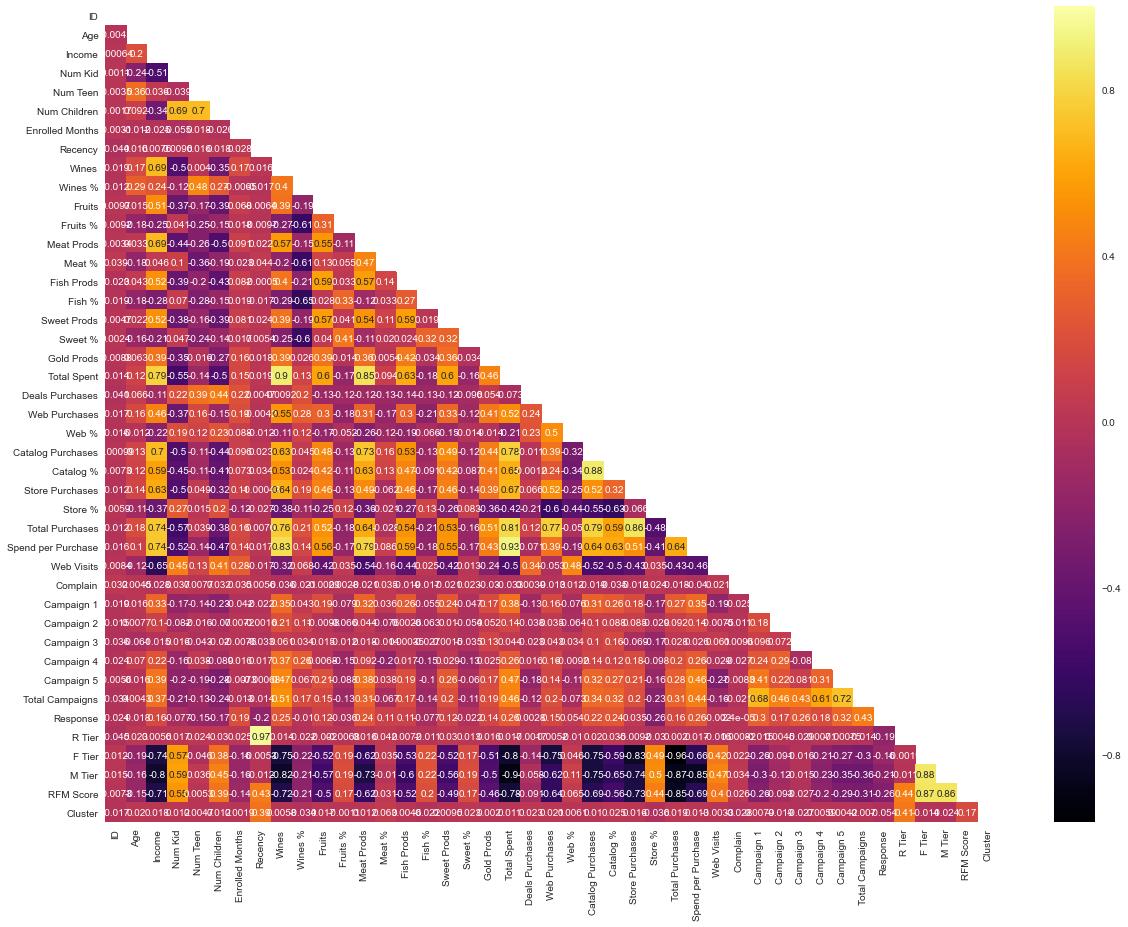

In [123]:
#Check correlation between features - clusterized sample
customers_corr = customers_merged.corr(method='pearson')
mask = np.zeros_like(customers_corr) 
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap='inferno')

As it shows above, the RFM is strongly correlated to F and M scores. However, the R score (Recency) plays an important role in the customers' segmentation(cluster).

In [124]:
#Create subset of dataset accordingly to the cluster that the customers belong
cluster0 = customers_merged[customers_merged['Cluster'] == 0]
cluster1 = customers_merged[customers_merged['Cluster'] == 1]
cluster2 = customers_merged[customers_merged['Cluster'] == 2]
cluster3 = customers_merged[customers_merged['Cluster'] == 3]

|Cluster|Profile|
|-|-|
| Cluster 0 |Low spenders|
|Cluster 1|'At risk' Customers|
|Cluster 2 |Top Customers|
|Cluster 3| 'Lost' Customers|

<AxesSubplot:>

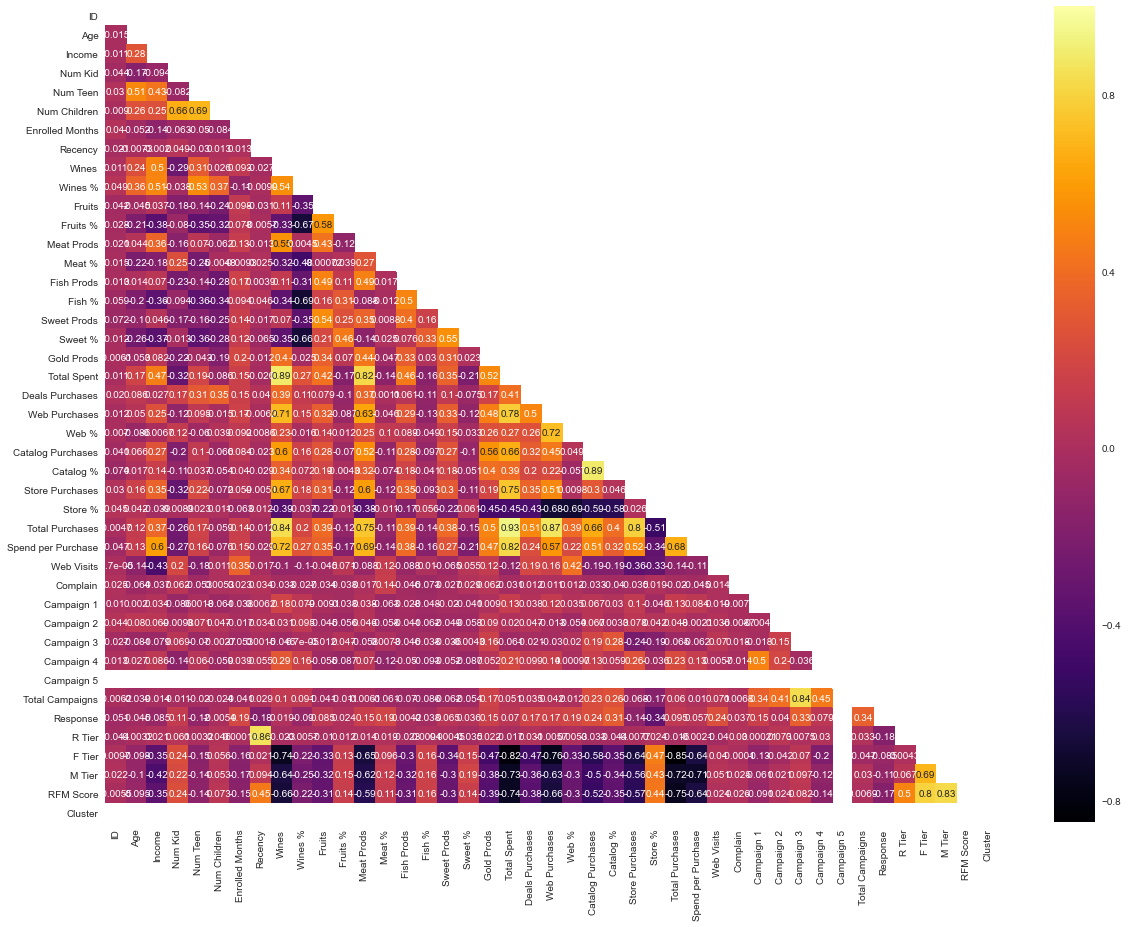

In [125]:
#Check correlation between features - cluster 0: Low Spenders
customers_corr0 = cluster0.corr(method='pearson')
mask = np.zeros_like(customers_corr0) 
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
sns.heatmap(customers_corr0, mask = mask, annot = True, cmap='inferno')

### Low spenders

#### Who are the customers that engage more?

##### Number of visits to company's website:
- Negative corr to wage
- Have children, specially small kids
- Do not spend great amount on products
- Do not buy through catalog or in store

#### Who are the customers that buy frequently?
- Have a good annual income
- Do not have small kids
- Spend more on products, specially wines
- Buy mainly in store

#### Who are the customers that accepted offer from last campaign?
- Accepted more offers from previous campaigns, specially from campaign 5
- Tend to spend more on products, specially wines

<AxesSubplot:>

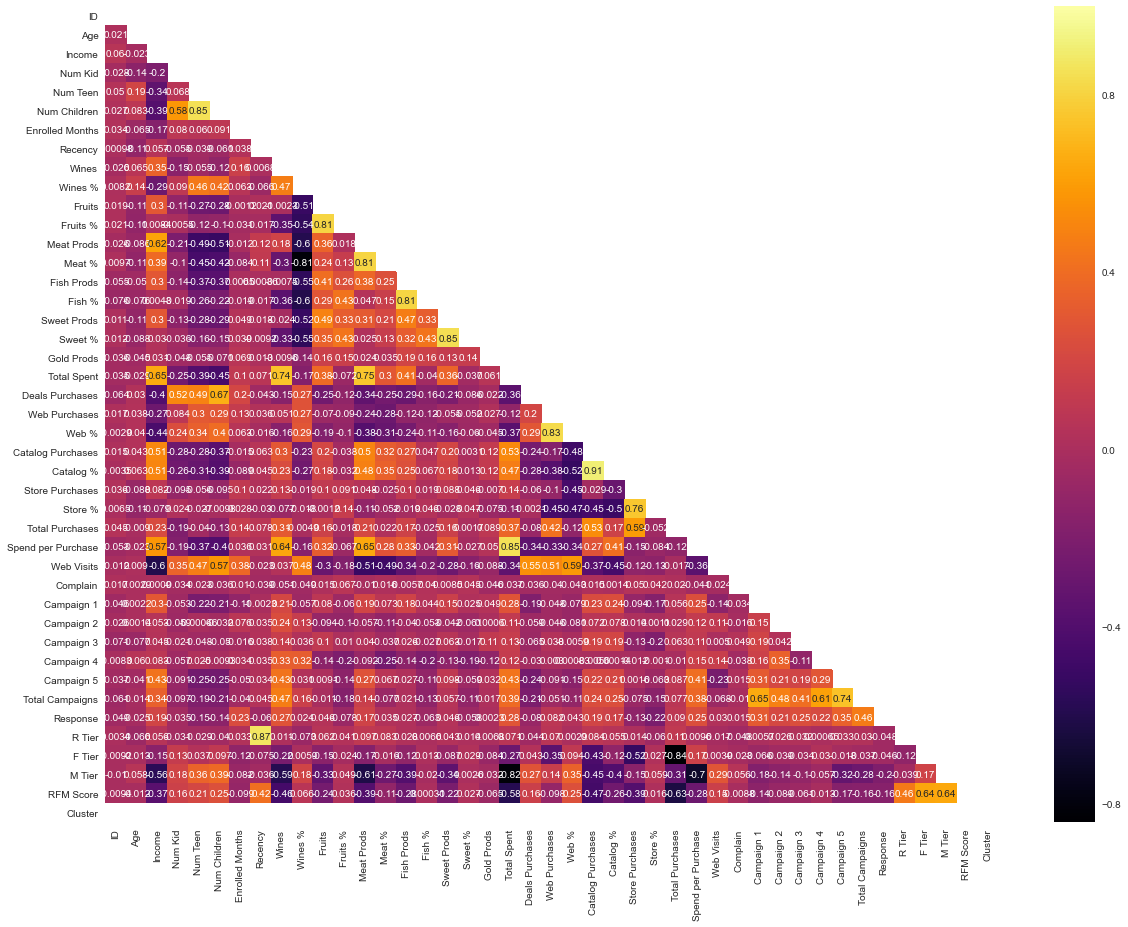

In [126]:
#Check correlation between features - cluster 1: At risk
customers_corr1 = cluster1.corr(method='pearson')
mask = np.zeros_like(customers_corr1) 
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
sns.heatmap(customers_corr1, mask = mask, annot = True, cmap='inferno')

<AxesSubplot:>

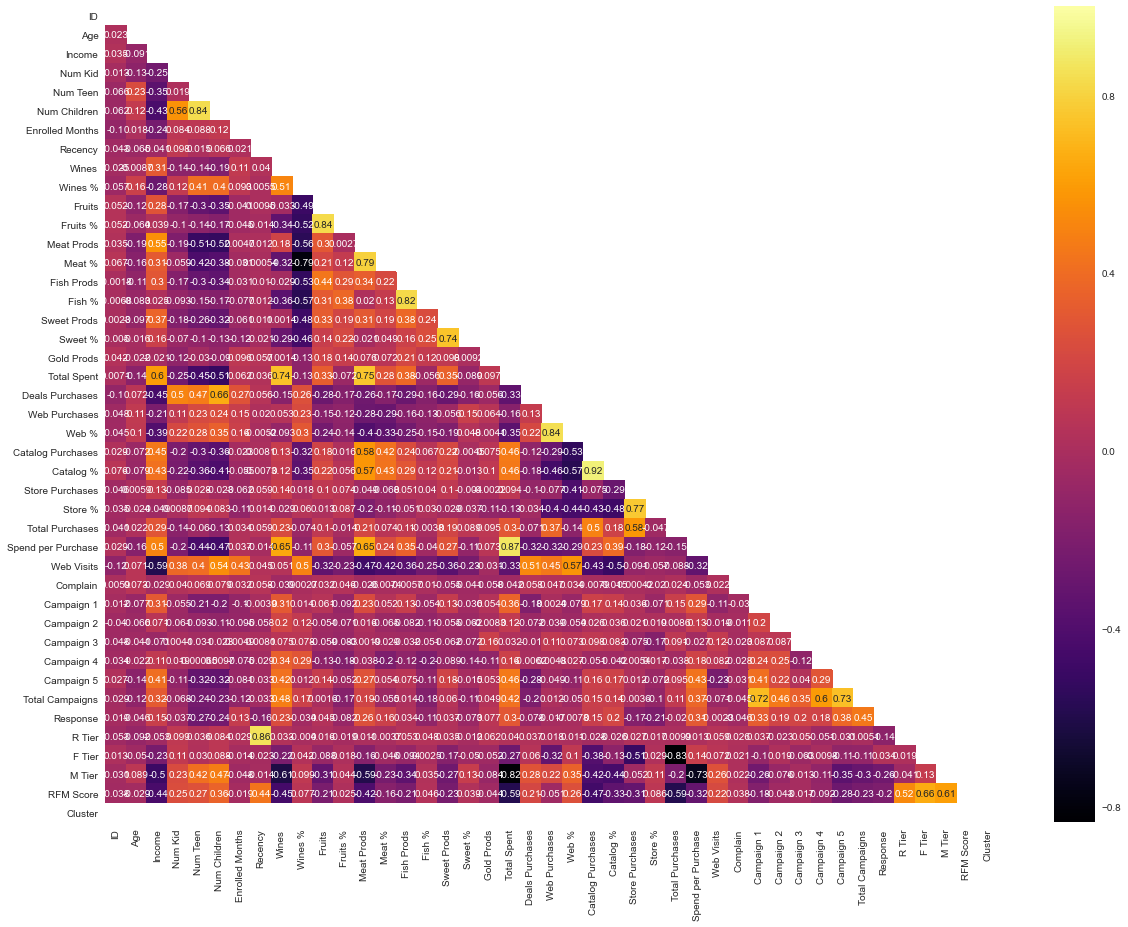

In [127]:
#Check correlation between features - cluster 2 - TOP Customers
customers_corr2 = cluster2.corr(method='pearson')
mask = np.zeros_like(customers_corr2) 
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
sns.heatmap(customers_corr2, mask = mask, annot = True, cmap='inferno')

### Who are the TOP customers?

#### Who are the customers that accepted offer from Campaign 6(target)?
- Accepted more offers from previous campaigns
- Accepted specially offer from campaigns 1 and 5

#### Who are the customers that  accepted more offers from previous campaigns?
- Accepted offer from campaigns 1, 4 and 5

#### Who are the customers with higher number of purchases?
- Buy mainly online, and in store
- Buy wines and meat products
- The customers who buy online, purchases more frequently and engage more (higher web visits)

#### Who are the customers that make a purchase by catalog and/or in store?
- Do Not have small kids at home

#### Who are the customers that spend more on products?
- Have higher income
- Not have kids at home
- Buy wines, meat products and sweet products

#### Who are the customers that engage more (visited more often the company's website last month)?
- Have children
- Buy products online, not by catalog
- Buy products with discount
- Have more months enrolled
- Do not have a high income

<AxesSubplot:>

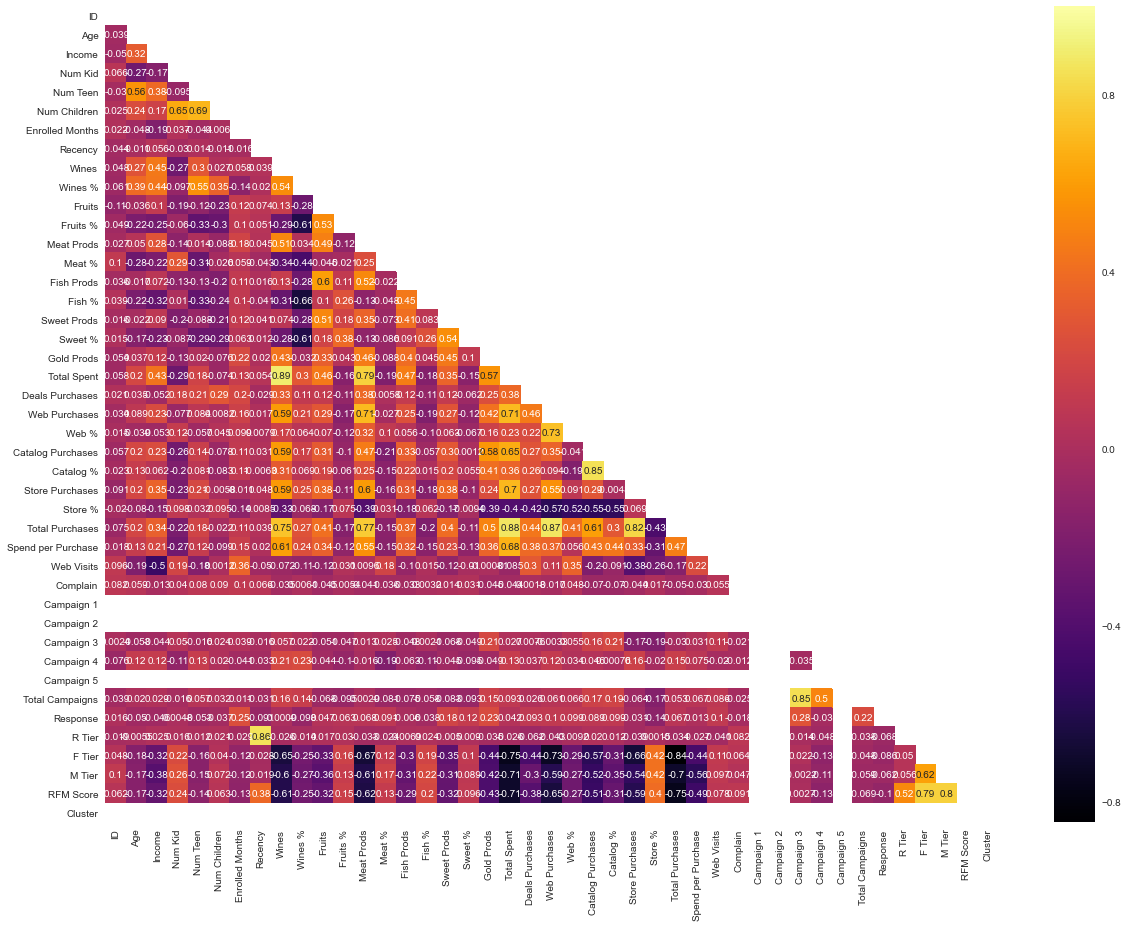

In [128]:
#Check correlation between features - cluster 3: Lost
customers_corr3 = cluster3.corr(method='pearson')
mask = np.zeros_like(customers_corr3) 
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))
sns.heatmap(customers_corr3, mask = mask, annot = True, cmap='inferno')

### Who are the 'Lost' customers?

#### Who are the customers that accepted offer from Campaign 6(target)?
- Accepted offer from campaign 3
- Are enrolled longer with the company

#### Who are the customers that  accepted more offers from previous campaigns?
- Accepted offer from campaign 3 and 4.

#### Who are the customers that  accepted offer from campaign 3?
- Spend more gold products
- Purchase made by catalog

#### Who are the customers with spend more on products?
- Higher income
- Spend more on wines, meat and gold products
- Spend more per purchase

#### Who are the customers with higher number of purchases?
- Higher income
- Do not purchase in store
- High spenders

#### Who are are the customers with higher RFM Score?
- Customers that mainly buys in store got a higher RFM Score

#### Who are the customers that engage more (visited more often the company's website last month)?
- Lower income
- More time enrolled with company
- Purchase deals

### Closer look at Clusters and Response


||Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3|
|-|-|-|-|-|
|'Name'|Lower Spender|At risk customers | Top customers|Lost customers |
|Recency| Recent transaction| Long time do not buy|Recent bought |Long time do not buy |
|Frequency| Do not purchase frequently| Used to buy frequently| Buy frequently|Do not purchase frequently |
|Monetary| Do not spend much| Used to be a high spender|High spender |Lower spender |

##### Age & Income

In [129]:
customers_pivot_sociodemog = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Age', 'Income'])
customers_pivot_sociodemog

Age        Income
Cluster Response                         
0       0         49.830928  36313.816495
        1         48.432099  32751.679012
1       0         54.758836  66641.594595
        1         53.888889  74070.111111
2       0         53.814721  66726.149746
        1         52.598639  71729.707483
3       0         50.758221  36387.305609
        1         47.954545  32968.818182

<AxesSubplot:title={'center':'Age per Cluster and Response'}, ylabel='Cluster,Response'>

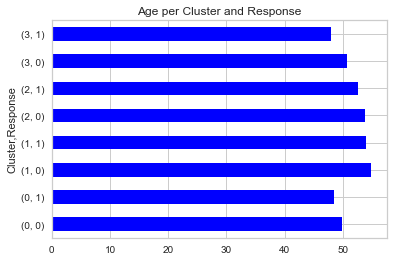

In [130]:
customers_pivot_sociodemog['Age'].plot(kind='barh',title='Age per Cluster and Response',colormap='winter')

- No difference of age between analysed groups.

<AxesSubplot:title={'center':'Annual Income per Cluster and Response'}, ylabel='Cluster,Response'>

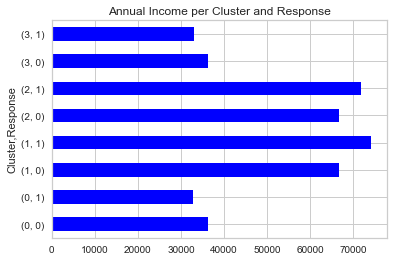

In [131]:
customers_pivot_sociodemog['Income'].plot(kind='barh',title='Annual Income per Cluster and Response',colormap='winter')

- Customers in clusters 2 (Top) and 1 ('At risk') who accepted the offer from last campaign have higher annual income than those who did not accept the offer.
- Not a big difference of income of customers that are not high spenders (cluster 0 and 3) who accepted or not last campaign's offer.

##### Children

In [132]:
customers_pivot_children = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Num Kid','Num Teen','Num Children'],aggfunc=np.sum)
customers_pivot_children

Num Children  Num Kid  Num Teen
Cluster Response                                 
0       0                  592      345       247
        1                   98       71        27
1       0                  339       65       274
        1                   35        8        27
2       0                  292       60       232
        1                   57       18        39
3       0                  656      393       263
        1                   25       17         8

<AxesSubplot:title={'center':'Children per Cluster and Response'}, ylabel='Cluster,Response'>

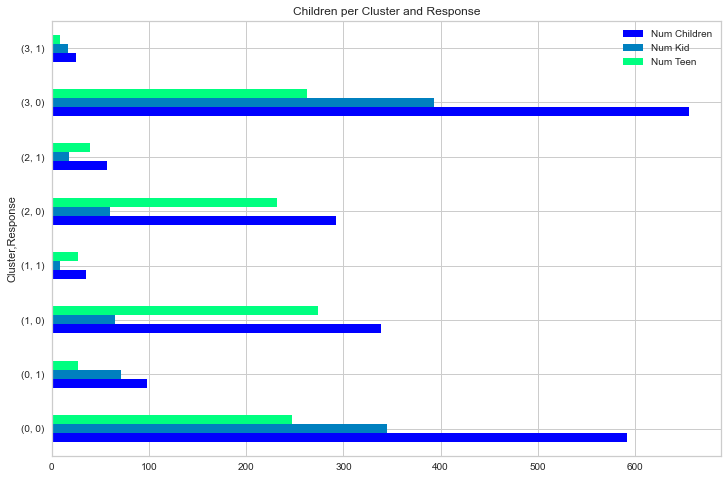

In [133]:
customers_pivot_children.plot(kind='barh',figsize=(12,8), title='Children per Cluster and Response', colormap='winter')

- Overall, customers who accepted offer from last campaign have no or less number of children than those who did not accept the offer.
- Customers in the cluster 3 ('Lost') have more children than customers in the other clusters. 
- Customers in the cluster 2 ('Top') have less children than customers in the other clusters.

##### Recency and Enrollment

In [134]:
customers_pivot_enrolrec = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Enrolled Months', 'Recency'])
customers_pivot_enrolrec

Enrolled Months    Recency
Cluster Response                            
0       0               92.715464  25.546392
        1               96.358025  18.111111
1       0               94.673597  73.891892
        1               99.012346  71.432099
2       0               94.307107  25.152284
        1               96.231293  19.897959
3       0               93.069632  75.038685
        1              101.136364  68.363636

<AxesSubplot:title={'center':'Enrollment and Recency per Cluster and Response'}, ylabel='Cluster,Response'>

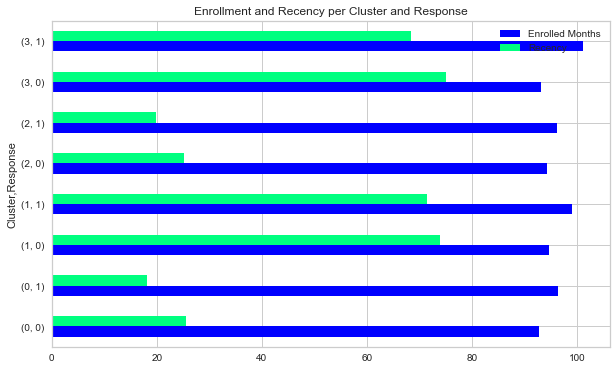

In [135]:
customers_pivot_enrolrec.plot(kind='barh',figsize=(10,6),title='Enrollment and Recency per Cluster and Response',colormap='winter')

- Overall, customers who accepted the offer from last campaign recently made a transaction with the company and are longer enrolled with the company.
- Clusters 0 and 2 have similar recency and number of months the customers are enrolled with the company. 

##### Detailed Purchase 

In [136]:
customers_pivot_purchases = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Catalog Purchases','Store Purchases','Web Purchases','Deals Purchases'])
customers_pivot_purchases

Catalog Purchases  Deals Purchases  Store Purchases  \
Cluster Response                                                        
0       0                  0.519588         2.020619         3.428866   
        1                  1.061728         2.691358         2.950617   
1       0                  4.565489         2.511435         8.305613   
        1                  6.037037         2.012346         7.308642   
2       0                  4.383249         2.634518         8.644670   
        1                  5.380952         2.224490         7.557823   
3       0                  0.640232         2.183752         3.371373   
        1                  1.000000         2.954545         3.181818   

                  Web Purchases  
Cluster Response                 
0       0              2.148454  
        1              2.827160  
1       0              5.731809  
        1              6.296296  
2       0              6.038071  
        1              5.938776  
3       0              2.255319  
        1              3.000000

<AxesSubplot:title={'center':'Purchase per Cluster and Response'}, ylabel='Cluster,Response'>

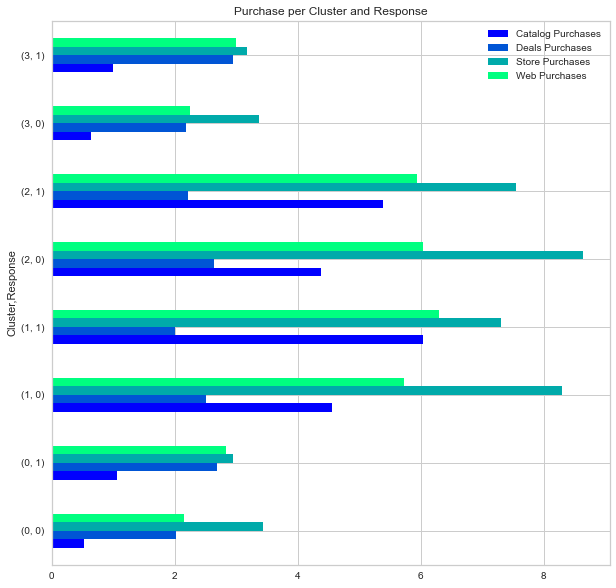

In [137]:
customers_pivot_purchases.plot(kind='barh',figsize=(10,10),title='Purchase per Cluster and Response',colormap='winter')

- The first sales channel option that customers consider when purchasing is in store, followed by web and catalog.
- Overall, customers who accepted last campaign's offer purchase more by catalog compared to those who did not accept the offer.
- Customers (in all clusters) who accepted the offer from last campaign purchase more by catalog compared to those who did not accept the offer.
- High spenders customers who purchased less products with discount tend to accept last campaign's offer.


##### Spend & Purchase

In [138]:
customers_pivot_spend = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Total Spent', 'Total Purchases','Spend per Purchase'])
customers_pivot_spend

Spend per Purchase  Total Purchases  Total Spent
Cluster Response                                                  
0       0                  12.528887         6.096907    91.832990
        1                  13.899136         6.839506   110.320988
1       0                  53.288960        18.602911   981.960499
        1                  71.512593        19.641975  1356.246914
2       0                  49.667893        19.065990   936.395939
        1                  68.289864        18.877551  1258.789116
3       0                  13.428956         6.266925    98.829787
        1                  14.215455         7.181818   120.045455

<AxesSubplot:title={'center':'Spend on Products per Cluster and Response'}, ylabel='Cluster,Response'>

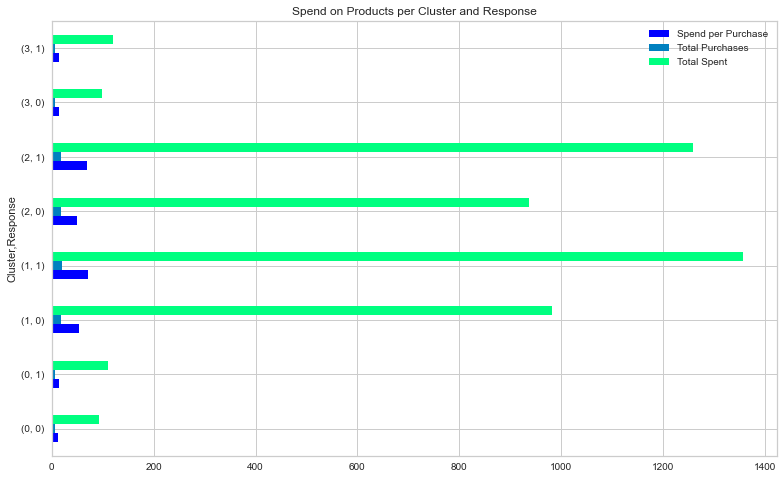

In [139]:
customers_pivot_spend.plot(kind='barh',figsize=(13,8),title='Spend on Products per Cluster and Response',colormap='winter')

- Customers in clusters 2 and 1 have a similar profile: high spenders, buy frequently and spend a 'good' amount per 'purchase'

##### Web Visits

In [140]:
customers_pivot_engage = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Web Visits'])
customers_pivot_engage

Web Visits
Cluster Response            
0       0           6.222680
        1           7.530864
1       0           4.160083
        1           4.358025
2       0           4.304569
        1           4.292517
3       0           6.342360
        1           7.454545

<AxesSubplot:title={'center':"Visits to Company's Website per Cluster and Response"}, ylabel='Cluster,Response'>

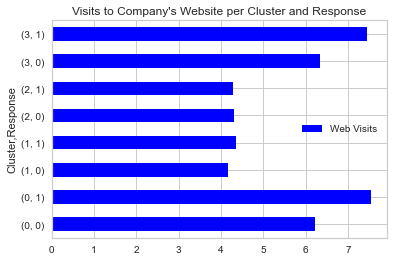

In [141]:
customers_pivot_engage.plot(kind='barh',title='Visits to Company\'s Website per Cluster and Response',colormap='winter')

- Customers in clusters 0 and 3 are the ones that engage more. Probably they browse and check for deals, but do not necessarily purchase.

##### Complain 

In [142]:
customers_pivot_complain = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Complain'])
customers_pivot_complain

Complain
Cluster Response          
0       0         0.012371
        1         0.024691
1       0         0.008316
        1         0.012346
2       0         0.007614
        1         0.000000
3       0         0.007737
        1         0.000000

<AxesSubplot:title={'center':'Complain per Cluster and Response'}, ylabel='Cluster,Response'>

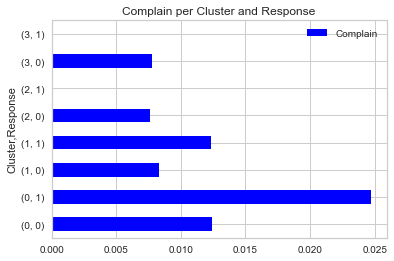

In [143]:
customers_pivot_complain.plot(kind='barh',title='Complain per Cluster and Response',colormap='winter')

- Customers in cluster 0 are the ones that complain more, followed by those in cluster 1. 
- Top customers who did not complain are the ones that accepted the last campaign's offer.

In [144]:
customers_pivot_campaigns = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Total Campaigns','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5'],aggfunc=np.sum)
customers_pivot_campaigns

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5  \
Cluster Response                                                               
0       0                  0           2          22           5           0   
        1                  2           1          25           3           0   
1       0                 36           6          21          51          45   
        1                 29           9          18          26          36   
2       0                 27           2          21          35          25   
        1                 47          10          26          33          54   
3       0                  0           0          22          11           0   
        1                  0           0           8           0           0   

                  Total Campaigns  
Cluster Response                   
0       0                      29  
        1                      31  
1       0                     159  
        1                     118  
2       0                     110  
        1                     170  
3       0                      33  
        1                       8

<AxesSubplot:title={'center':'Offers accepted from previous Campaigns'}, ylabel='Cluster,Response'>

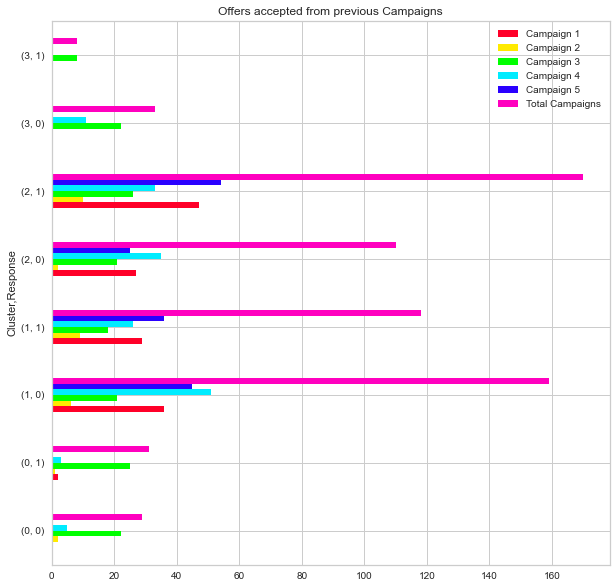

In [145]:
customers_pivot_campaigns.plot(kind='barh',figsize=(10,10),title='Offers accepted from previous Campaigns',colormap='gist_rainbow') 

- Customers in the cluster 2 (Top) and 1 (At risk) accepted more offers from previous campaigns, especially from campaigns 5 and 1.
- Only customers in the cluster 2 (Top) who accepted more offers from previous campaigns accepted offer from last campaign.
- Curious to note that all clusters, except cluster 2 (Top), customers who accepted last campaign's offer not necessary accepted more offers from previous campaigns.

In [146]:
customers_pivot_prods = pd.pivot_table(data=customers_merged,index=['Cluster','Response'], values=['Wines %','Meat %','Fish %','Sweet %'])
customers_pivot_prods

Fish %     Meat %    Sweet %    Wines %
Cluster Response                                            
0       0         10.991649  26.529711   6.910474  48.455629
        1          9.589136  33.241605   7.822469  41.602716
1       0          6.712162  27.580644   5.002100  55.997464
        1          5.624074  29.042346   4.200494  57.415556
2       0          7.172259  26.871827   5.155279  55.628579
        1          5.535238  32.023129   4.164354  54.056667
3       0         10.228201  29.659304   7.370696  45.746712
        1          7.915455  35.484545  13.495909  33.387727

<AxesSubplot:title={'center':'Spend on Products(%) per Cluster and Response'}, ylabel='Cluster,Response'>

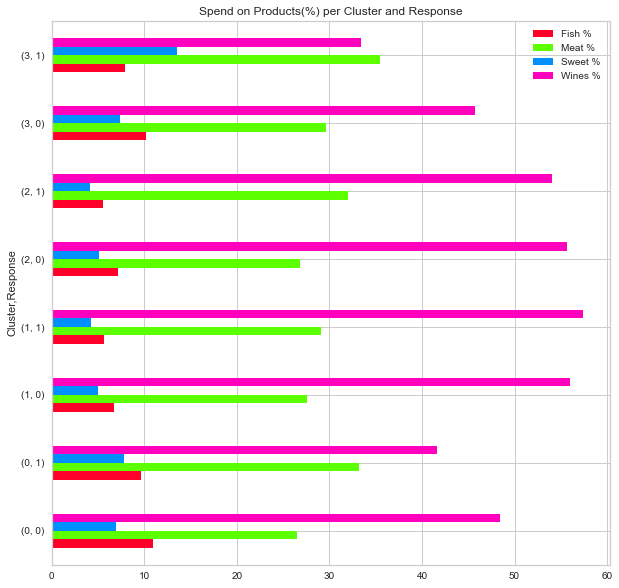

In [147]:
customers_pivot_prods.plot(kind='barh',figsize=(10,10),title='Spend on Products(%) per Cluster and Response',colormap='gist_rainbow')

- Overall customers spend more on wine, followed by meat. They are the flagship products.
- Customers who accepted last campaign's offer spend more on meat products than those who did not accept the offer.
- Low spenders (cluster 0 and 3) spend more on fish products and sweets than high spenders.

### Get to know more about TOP Customers
##### 541 TOP Customers from 2208: 24.5% of customers are classified as TOP customers


In [148]:
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,541.0,5678.094270,3268.582744,1.00,2877.00,5512.00,8643.00,11176.00
Age,541.0,53.484288,11.837098,26.00,45.00,53.00,63.00,77.00
Income,541.0,68085.711645,14867.910825,2447.00,59235.00,68487.00,77622.00,160803.00
Num Kid,541.0,0.144177,0.356823,0.00,0.00,0.00,0.00,2.00
Num Teen,541.0,0.500924,0.539632,0.00,0.00,0.00,1.00,2.00
Num Children,541.0,0.645102,0.652431,0.00,0.00,1.00,1.00,3.00
Enrolled Months,541.0,94.829945,6.633857,83.00,89.00,95.00,100.00,106.00
Recency,541.0,23.724584,14.547111,0.00,11.00,24.00,36.00,49.00
Wines,541.0,552.149723,311.066585,1.00,304.00,494.00,758.00,1478.00
Wines %,541.0,55.201460,20.556379,0.06,39.28,55.41,72.51,96.17


## Predictive model

In [149]:
#Drop some columns
customers_merged=customers_merged.drop(['Age Group', 'Recency Category','Purchases Category', 'Campaigns Category','Spend Category','Gold Prods Category','Spend/Purchase Category'], axis = 1)
customers_merged.head()

,ID,Age,Marital,Education,Income,Num Kid,Num Teen,Num Children,Enrolled Months,Recency,...,Campaign 4,Campaign 5,Total Campaigns,Response,R Tier,F Tier,M Tier,RFM Score,Cluster,Profile
214,0,36,Married,Graduation,70951,0,0,0,96,66,...,0,0,0,0,3,2,1,6,1,At risk
822,1,60,Single,Graduation,57091,0,0,0,83,0,...,0,0,1,1,1,2,2,5,2,Top
1511,9,46,Single,Master,46098,1,1,2,105,86,...,0,0,0,0,4,3,3,10,3,Lost
1654,13,74,Widow,PhD,25358,0,1,1,94,57,...,0,0,0,0,3,4,4,11,3,Lost
1906,17,50,Married,PhD,60491,0,1,1,92,81,...,0,0,0,0,4,1,2,7,1,At risk


In [150]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 214 to 341
Data columns (total 46 columns):
ID                    2208 non-null int64
Age                   2208 non-null int64
Marital               2208 non-null object
Education             2208 non-null object
Income                2208 non-null int64
Num Kid               2208 non-null int64
Num Teen              2208 non-null int64
Num Children          2208 non-null int64
Enrolled Months       2208 non-null int64
Recency               2208 non-null int64
Wines                 2208 non-null int64
Wines %               2208 non-null float64
Fruits                2208 non-null int64
Fruits %              2208 non-null float64
Meat Prods            2208 non-null int64
Meat %                2208 non-null float64
Fish Prods            2208 non-null int64
Fish %                2208 non-null float64
Sweet Prods           2208 non-null int64
Sweet %               2208 non-null float64
Gold Prods            2208 non-null int6

In [151]:
#Transform 'object' type column into numerical column (Education and Marital)

new_marital = customers_merged['Marital'].replace(['Single','Married', 'Divorced','Widow'],[0,1,2,3])
customers_merged.insert(2,'Marital Status',value=new_marital)

new_education = customers_merged['Education'].replace(['Basic','2n Cycle','Graduation', 'Master','PhD'],[0,1,2,3,4])
customers_merged.insert(3,'Education Level',value=new_education)

In [152]:
#Check if the columns were transformed properly

#Education
customers_ed = customers_merged.groupby('Education Level')['Education'].unique()
pd.DataFrame({'Education Level':customers_ed.index, 'Education':customers_ed.values})

,Education,Education Level
0,[Basic],0
1,[2n Cycle],1
2,[Graduation],2
3,[Master],3
4,[PhD],4


In [153]:
#Marital
customers_ms=customers_merged.groupby('Marital Status')['Marital'].unique()
pd.DataFrame({'Marital Status':customers_ms.index, 'Marital':customers_ms.values})

,Marital,Marital Status
0,[Single],0
1,[Married],1
2,[Divorced],2
3,[Widow],3


In [154]:
#Drop 'original' Education and Marital columns and leave the transformed ones 
customers_merged=customers_merged.drop(['Marital','Education','Profile'], axis = 1)
customers_merged.head()

,ID,Age,Marital Status,Education Level,Income,Num Kid,Num Teen,Num Children,Enrolled Months,Recency,...,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Response,R Tier,F Tier,M Tier,RFM Score,Cluster
214,0,36,1,2,70951,0,0,0,96,66,...,0,0,0,0,0,3,2,1,6,1
822,1,60,0,2,57091,0,0,0,83,0,...,0,0,0,1,1,1,2,2,5,2
1511,9,46,0,3,46098,1,1,2,105,86,...,0,0,0,0,0,4,3,3,10,3
1654,13,74,3,4,25358,0,1,1,94,57,...,0,0,0,0,0,3,4,4,11,3
1906,17,50,1,4,60491,0,1,1,92,81,...,0,0,0,0,0,4,1,2,7,1


In [155]:
#Keep only the % of spend on each prod and % of purchase per sales channel
customers_merged=customers_merged.drop(['Meat Prods','Sweet Prods','Fish Prods','Wines','Web Purchases','Store Purchases','Catalog Purchases'], axis = 1)
customers_merged.head()

,ID,Age,Marital Status,Education Level,Income,Num Kid,Num Teen,Num Children,Enrolled Months,Recency,...,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Response,R Tier,F Tier,M Tier,RFM Score,Cluster
214,0,36,1,2,70951,0,0,0,96,66,...,0,0,0,0,0,3,2,1,6,1
822,1,60,0,2,57091,0,0,0,83,0,...,0,0,0,1,1,1,2,2,5,2
1511,9,46,0,3,46098,1,1,2,105,86,...,0,0,0,0,0,4,3,3,10,3
1654,13,74,3,4,25358,0,1,1,94,57,...,0,0,0,0,0,3,4,4,11,3
1906,17,50,1,4,60491,0,1,1,92,81,...,0,0,0,0,0,4,1,2,7,1


In [156]:
#Get only data from top customers
customers_top = customers_merged[customers_merged['Cluster'] == 2]

In [157]:
#Drop Cluster column
customers_top=customers_top.drop(['Cluster'], axis = 1)
customers_merged=customers_merged.drop(['Cluster'], axis = 1)

| Degree / Correlation | Coefficient Range|
|-|-|
|High / Strong| ± 0.50 and ± 1 |
| Moderate / Moderate| ± 0.30 and ± 0.49|
|Low / Small | value lies below + . 29|

In [158]:
customers_correlation=round(abs(customers_merged.corr()['Response']),3).sort_values(ascending=False)
customers_correlation=customers_correlation.to_frame()
customers_correlation.head(31)

,Response
Response,1.000
Total Campaigns,0.427
Campaign 5,0.323
Campaign 1,0.295
Total Spent,0.264
Store %,0.262
Spend per Purchase,0.260
RFM Score,0.258
Campaign 3,0.255
Catalog %,0.243


In [159]:
#Check feature importance: all customers

feat = customers_corr.index[1:30].values
X = customers_merged[feat].values
y = customers_merged['Response'].values

#Split the data (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feat)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

KeyError: "['Wines' 'Meat Prods' 'Fish Prods' 'Sweet Prods' 'Web Purchases'\n 'Catalog Purchases' 'Store Purchases'] not in index"

# Get features for model: Top Customers

#List of features correlation coef based on target(strongest to weaker corr)
customers_correlationT=round(abs(customers_top.corr()['Response']),3).sort_values(ascending=False)
customers_correlationT=customers_correlationT.to_frame()
customers_correlationT.head(35)

In [160]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 214 to 341
Data columns (total 37 columns):
ID                    2208 non-null int64
Age                   2208 non-null int64
Marital Status        2208 non-null int64
Education Level       2208 non-null int64
Income                2208 non-null int64
Num Kid               2208 non-null int64
Num Teen              2208 non-null int64
Num Children          2208 non-null int64
Enrolled Months       2208 non-null int64
Recency               2208 non-null int64
Wines %               2208 non-null float64
Fruits                2208 non-null int64
Fruits %              2208 non-null float64
Meat %                2208 non-null float64
Fish %                2208 non-null float64
Sweet %               2208 non-null float64
Gold Prods            2208 non-null int64
Total Spent           2208 non-null int64
Deals Purchases       2208 non-null int64
Web %                 2208 non-null float64
Catalog %             2208 non-null floa

#### All customers

In [161]:
#Transforme into Gaussian-like
powerT = customers_merged.drop(['ID','Response'],axis=1)

customer_powerT = customers_merged
for col in powerT.columns:
    customer_powerT[col] = PowerTransformer().fit_transform(customers_merged[[col]]).flatten()

customers_corr=round(abs(customers_merged.corr()['Response']),2).sort_values(ascending=False)
customers_corr=customers_corr.to_frame()

In [162]:
#Select the first 15 features that showed higher corr with target feature('Response') 
selected_features = customers_corr.index[1:30].values

X = customers_merged[selected_features].values
y = customers_merged['Response'].values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [164]:
counter = collections.Counter(y)
counter

Counter({0: 1877, 1: 331})

###### Imbalanced classification
There are too few examples of the minority class for a model to effectively learn the decision boundary

To solve this problem: 
- oversample the examples in the minority class: duplicate examples from the minority class (that way, balances the class distribution and not provide additional information to the model). The chose oversampling technique is the Minority Oversampling TEchnique (SMOTE)

In [165]:
#Oversampling the 'minority' class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [166]:
#logistic regression model - all customers

modelLR = LogisticRegression(random_state=10, solver='liblinear').fit(X_train,y_train)


predicted = modelLR.predict(X_train)
modelLR.predict_proba(X_train)

array([[0.98178753, 0.01821247],
       [0.86117996, 0.13882004],
       [0.94421311, 0.05578689],
       ...,
       [0.37305616, 0.62694384],
       [0.10356442, 0.89643558],
       [0.19974978, 0.80025022]])

##### All Customers | Logistic Regression 

Logistic Regression (All Customers)

Accuracy(std): 0.891 (0.024)
Logloss(std): -0.257 (0.040)
AUC(std): 0.908 (0.024)
MAE(std): -0.109 (0.024)
R^2(std): 0.145 (0.139)
f1 Score(std): 0.853 (0.139)



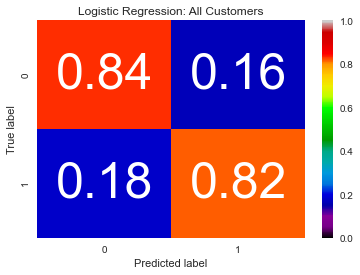

In [167]:
#Metrics to evaluate Logistic Regression Model - all customers

from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoringAcc = 'accuracy'
scoringLog = 'neg_log_loss'
scoringRoc = 'roc_auc'
scoringMAE = 'neg_mean_absolute_error'
scoringRS = 'r2'

resLR_Acc = model_selection.cross_val_score(modelLR, X, y, cv=kfold, scoring=scoringAcc)
resLR_Log = model_selection.cross_val_score(modelLR, X, y, cv=kfold, scoring=scoringLog)
resLR_Roc = model_selection.cross_val_score(modelLR, X, y, cv=kfold, scoring=scoringRoc)
resLR_MAE = model_selection.cross_val_score(modelLR, X, y, cv=kfold, scoring=scoringMAE)
resLR_RS = model_selection.cross_val_score(modelLR, X, y, cv=kfold, scoring=scoringRS)
resLR_f1 = f1_score(y_train,predicted)

#reportLR = classification_report(y_test, predicted)

#Confusion Matrix

def cfMatrix(cfm, classes=None,title=None):
    if classes is not None:
        sns.heatmap(cfm, cmap="nipy_spectral", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cfm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Print Logistic Results for all customers

print("Logistic Regression (All Customers)")
print('=====================================')
print('')
print("Accuracy(std): %.3f (%.3f)" % (resLR_Acc.mean(), resLR_Acc.std()))
print("Logloss(std): %.3f (%.3f)" % (resLR_Log.mean(), resLR_Log.std()))
print("AUC(std): %.3f (%.3f)" % (resLR_Roc.mean(), resLR_Roc.std()))
print("MAE(std): %.3f (%.3f)" % (resLR_MAE.mean(), resLR_MAE.std()))
print("R^2(std): %.3f (%.3f)" % (resLR_RS.mean(), resLR_RS.std()))
print("f1 Score(std): %.3f (%.3f)" % (resLR_f1.mean(), resLR_RS.std()))
print('')
print('=====================================')

cfm_modelLR= confusion_matrix(y_test, modelLR.predict(X_test))
cfm_modelLR_f = cfm_modelLR / cfm_modelLR.sum(axis=1).reshape(-1,1)
cfm_modelLR_p = 100*cfm_modelLR_f
titleLR = 'Logistic Regression: All Customers'
cfmLR = cfMatrix(cfm_modelLR_f, classes = modelLR.classes_,title=titleLR)

### TOP Customers

In [168]:
#Transform data before Logistic Regression - Make data more Gaussian-like

powerTop= customers_top.drop(['ID','Response'],axis=1)

customers_powerTop = customers_top
pcol = powerTop.columns

for col in pcol:
    customers_powerTop[col] = PowerTransformer().fit_transform(customers_top[[col]]).flatten()


In [169]:
#Logistic Regression - data first 15 features with higher correlation with 'Response'(Campaign 6)
customers_corrTop = round(abs(customers_top.corr()['Response']),2).sort_values(ascending=False)
customers_corrTop = customers_corrTop.to_frame()

selected_featuresTop = customers_corrTop.index[1:17].values

In [170]:
#Split data

X = cluster2[selected_featuresTop].values
y = cluster2['Response'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train, y_train = smote.fit_resample(X_train, y_train)

##### Top Customers | Logistic Regression

In [171]:
modelLRT = LogisticRegression(random_state=10, solver='liblinear').fit(X_train,y_train) 
predicted =modelLRT.predict(X_train)
modelLRT.predict_proba(X_train)

array([[0.31848671, 0.68151329],
       [0.36679914, 0.63320086],
       [0.20615583, 0.79384417],
       ...,
       [0.06596636, 0.93403364],
       [0.30885644, 0.69114356],
       [0.71181702, 0.28818298]])

Logistic Regression (TOP Customers)

Accuracy(std): 0.776 (0.045)
Logloss(std): -0.496 (0.077)
AUC(std): 0.778 (0.084)
MAE(std): -0.224 (0.045)
R^2(std): -0.142 (0.151)
f1 Score(std): 0.757 (0.151)



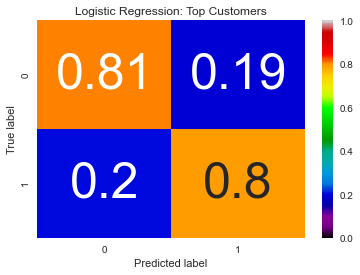

In [172]:
#Metrics to evaluate Logistic Regression: Top Customers

resLRT_Acc = model_selection.cross_val_score(modelLRT, X, y, cv=kfold, scoring=scoringAcc)
resLRT_Log = model_selection.cross_val_score(modelLRT, X, y, cv=kfold, scoring=scoringLog)
resLRT_Roc = model_selection.cross_val_score(modelLRT, X, y, cv=kfold, scoring=scoringRoc)
resLRT_MAE = model_selection.cross_val_score(modelLRT, X, y, cv=kfold, scoring=scoringMAE)
resLRT_RS = model_selection.cross_val_score(modelLRT, X, y, cv=kfold, scoring=scoringRS)
resLRT_f1 = f1_score(y_train, predicted)
#Print Logistic Results for TOP customers
print("Logistic Regression (TOP Customers)")
print('=====================================')
print('')
print("Accuracy(std): %.3f (%.3f)" % (resLRT_Acc.mean(), resLRT_Acc.std()))
print("Logloss(std): %.3f (%.3f)" % (resLRT_Log.mean(), resLRT_Log.std()))
print("AUC(std): %.3f (%.3f)" % (resLRT_Roc.mean(), resLRT_Roc.std()))
print("MAE(std): %.3f (%.3f)" % (resLRT_MAE.mean(), resLRT_MAE.std()))
print("R^2(std): %.3f (%.3f)" % (resLRT_RS.mean(), resLRT_RS.std()))
print("f1 Score(std): %.3f (%.3f)" % (resLRT_f1.mean(), resLRT_RS.std()))
print('')
print('=====================================')


cfm_modelLRT = confusion_matrix(y_test, modelLRT.predict(X_test))
cfm_modelLRT_f = cfm_modelLRT / cfm_modelLRT.sum(axis=1).reshape(-1,1)
cfm_modelLRT_p = 100*cfm_modelLRT_f
titleLRT = 'Logistic Regression: Top Customers'
cfmRLT = cfMatrix(cfm_modelLRT_f, classes = modelLRT.classes_, title=titleLRT)

### Metrics to Evaluate Models

||All Customers | Top Customers |Notes|
|-|-|-|-|-|-|
|Accuracy(std)| 0.891(0.024)| 0.776(0.045)| Ratio of correct predictions made|
|Confusion Matrix True Positives (Accepted/Not Accepted)|0.82/0.84 | 0.80/0.80| |
|Log loss(std)| -0.275(0.040)| -0.496(0.077)| Measure of confidence for a prediction by an algorithm.Smaller log loss is better(0 is the perfect Log loss)|
|ROC AUC (std) | 0.908(0.024)| 0.778(0.084) | Performance metric for binary classification problems.Higher AUC is better (1 represents a model that made all predictions perfectly|
|MAE (std)|-0.109(0.024) | -0.224(0.045) | It gives an idea of how wrong the predictions were. Smaller MAE is better (0 indicates no error, in other words, perfect predictions|
|R^2(std)| 0.145(0.139)| -0.142(0.151)| Higher R Square is better (1 indicates a perfect fit) |
| f1 Score (std) |0.852 (0.126) | 0.752(0.258)|  Combines precision and recall of the model. The higher the better (1.0 indicates perfect precision and recall)|

# THANKS FOR THE OPPORTUNITY!